In [27]:
import numpy as np
import pandas as pd

import kaggleSurveyCount as pf

# 아래는 로컬에 설치해야할 library들임. 없는 경우에는 따로 설치해주세요.
# import matplotlib as mpl
# mpl.use('Agg')
# import matplotlib.pylab as plt
# import seaborn as sns
# sns.set()
# sns.set_style("whitegrid")
# sns.set_color_codes()

pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_colwidth', -1)

# Pretty display for notebooks
%matplotlib inline

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

D:\Fastcampus\DSS\project4_KaggleSurvey\HyowonJang\Project_Root\kaggleSurveyCount.py:6: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 657, in launch_instance
    app.initialize(argv)
  File "<decorator-gen-124>", line 2, in initialize
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\co

In [28]:
ks = pf.KaggleSurvey(is_update=False)

Initializing.
Done.
Tab 키를 이용해서 내부 함수들을 꼭 확인하셔서 같은 작업을 두 번 안하시길.. 화이팅


In [32]:
pd.set_option('display.max_columns', 5000)
df = pd.read_csv("asset/kaggle-survey-2018/multipleChoiceResponses.csv")
df.head(15)

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,Q7_OTHER_TEXT,Q8,Q9,Q10,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7,Q11_OTHER_TEXT,Q12_MULTIPLE_CHOICE,Q12_Part_1_TEXT,Q12_Part_2_TEXT,Q12_Part_3_TEXT,Q12_Part_4_TEXT,Q12_Part_5_TEXT,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_Part_13,Q13_Part_14,Q13_Part_15,Q13_OTHER_TEXT,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER_TEXT,Q15_Part_1,Q15_Part_2,Q15_Part_3,Q15_Part_4,Q15_Part_5,Q15_Part_6,Q15_Part_7,Q15_OTHER_TEXT,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_Part_16,Q16_Part_17,Q16_Part_18,Q16_OTHER_TEXT,Q17,Q17_OTHER_TEXT,Q18,Q18_OTHER_TEXT,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_Part_6,Q19_Part_7,Q19_Part_8,Q19_Part_9,Q19_Part_10,Q19_Part_11,Q19_Part_12,Q19_Part_13,Q19_Part_14,Q19_Part_15,Q19_Part_16,Q19_Part_17,Q19_Part_18,Q19_Part_19,Q19_OTHER_TEXT,Q20,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_Part_6,Q21_Part_7,Q21_Part_8,Q21_Part_9,Q21_Part_10,Q21_Part_11,Q21_Part_12,Q21_Part_13,Q21_OTHER_TEXT,Q22,Q22_OTHER_TEXT,Q23,Q24,Q25,Q26,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_Part_7,Q27_Part_8,Q27_Part_9,Q27_Part_10,Q27_Part_11,Q27_Part_12,Q27_Part_13,Q27_Part_14,Q27_Part_15,Q27_Part_16,Q27_Part_17,Q27_Part_18,Q27_Part_19,Q27_Part_20,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_Part_13,Q28_Part_14,Q28_Part_15,Q28_Part_16,Q28_Part_17,Q28_Part_18,Q28_Part_19,Q28_Part_20,Q28_Part_21,Q28_Part_22,Q28_Part_23,Q28_Part_24,Q28_Part_25,Q28_Part_26,Q28_Part_27,Q28_Part_28,Q28_Part_29,Q28_Part_30,Q28_Part_31,Q28_Part_32,Q28_Part_33,Q28_Part_34,Q28_Part_35,Q28_Part_36,Q28_Part_37,Q28_Part_38,Q28_Part_39,Q28_Part_40,Q28_Part_41,Q28_Part_42,Q28_Part_43,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_Part_13,Q29_Part_14,Q29_Part_15,Q29_Part_16,Q29_Part_17,Q29_Part_18,Q29_Part_19,Q29_Part_20,Q29_Part_21,Q29_Part_22,Q29_Part_23,Q29_Part_24,Q29_Part_25,Q29_Part_26,Q29_Part_27,Q29_Part_28,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_Part_13,Q30_Part_14,Q30_Part_15,Q30_Part_16,Q30_Part_17,Q30_Part_18,Q30_Part_19,Q30_Part_20,Q30_Part_21,Q30_Part_22,Q30_Part_23,Q30_Part_24,Q30_Part_25,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32,Q32_OTHER,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_OTHER_TEXT,Q35_Part_1,Q35_Part_2,Q35_Part_3,Q35_Part_4,Q35_Part_5,Q35_Part_6,Q35_OTHER_TEXT,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_Part_10,Q36_Part_11,Q36_Part_12,Q36_Part_13,Q36_OTHER_TEXT,Q37,Q37_OTHER_TEXT,Q38_Part_1,Q38_Part_2,Q38_Part_3,Q38_Part_4,Q38_Part_5,Q38_Part_6,Q38_Part_7,Q38_Part_8,Q38_Part_9,Q38_Part_10,Q38_Part_11,Q38_Part_12,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_16,Q38_Part_17,Q38_Part_18,Q38_Part_19,Q38_Part_20,Q38_Part_21,Q38_Part_22,Q38_OTHER_TEXT,Q39_Part_1,Q39_Part_2,Q40,Q41_Part_1,Q41_Part_2,Q41_Part_3,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_OTHER_TEXT,Q43,Q44_Part_1,Q44_Part_2,Q44_Part_3,Q44_Part_4,Q44_Part_5,Q44_Part_6,Q45_Part_1,Q45_Part_2,Q45_P

In [2]:
# 단수응답 : 문제 열 하나에 단수응답이 표기됨
# 복수응답 : 문제 열이 응답 개수만큼 있고 해당 응답이 표기됨

In [43]:
# 캐나다, 미국, 독일, 중국, 인도의
# 여성
# 25-29
# 학사
countries = ["Canada","United States of America","Germany","India","China","South Korea"]
df_ = df[(df['Q1']=='Female')&(df['Q2']=="25-29")&(df['Q3']=="Canada")&(df['Q4']=='Bachelor’s degree')]

In [149]:
df.loc[1:,'Q4'].unique()

array(['Doctoral degree', 'Bachelor’s degree', 'Master’s degree',
       'Professional degree',
       'Some college/university study without earning a bachelor’s degree',
       'I prefer not to answer', 'No formal education past high school',
       nan], dtype=object)

In [64]:
dfs = {}
for i in countries:
    dfs[i] = df[(df['Q1']=='Female')&(df['Q2']=="18-21")&(df['Q3']==i)&(df['Q4']=='Bachelor’s degree')]

dfs_ = {}
for i in countries:
    dfs_[i] = df[(df['Q1']=='Female')&(df['Q2']=="22-24")&(df['Q3']==i)&(df['Q4']=='Bachelor’s degree')]

# 위 조건에서 국가만 다르게 해서 df들을 만들고
# ks.draw_plot으로 문항마다 플롯을 그리고 싶은데

# 딕셔너리의 Key, Value 형태로 저장하는게 for문을 사용하여 변수명을 다르게 하려는 것을 대체할 수 있는가가
# 의문이었는데
# 변수명 대신에 dic["원하는 키워드"]하면 변수명과 같은 역할을 해주니까 딕셔너리를 활용하면 된다

In [84]:
def dfs_by_criterias(country = [], sex="", age="", edu=""):
    dfs = {}
    for i in country:
        dfs[i] = df[(df['Q1']==sex)&(df['Q2']==age)&(df['Q3']==i)&(df['Q4']==edu)]
    return dfs

In [120]:
cri

[['Canada',
  'United States of America',
  'Germany',
  'India',
  'China',
  'South Korea'],
 ['Female'],
 ['18-21', '22-24', '25-29', '30-34']]

In [ ]:
def dfs_by_criterias_1(country = [], sex = [], age = [], edu = []):
    dfs = {}
    if len(country)+len(sex)+len(age)+len(edu) != 0:
        
                    dfs[i] = df[(df['Q1']==sex)&(df['Q2']==age)&(df['Q3']==i)&(df['Q4']==edu)]
    for i in country:
        dfs[i] = df[(df['Q1']==sex)&(df['Q2']==age)&(df['Q3']==i)&(df['Q4']==edu)]
    return dfs

# 리스트가 0이면 전체를 반영하고, 아니면 그 조건마다의 df를 만들어 dfs 딕셔너리로 만듦
# 전체 조건이 0이 아닌 경우만 취급
# 하나의 조건만 0이 아니면 다른 조건들은 전체

In [104]:
def df_count(dfs):
    li = list(dfs.keys())
    for i in li:
        print(i, len(dfs[i]))

In [130]:
countries = ["Canada","United States of America","Germany","India","China"]

In [131]:
dfs_1 = dfs_by_criterias(country=countries, sex="Female", age="18-21", edu="Bachelor’s degree")
dfs_2 = dfs_by_criterias(country=countries, sex="Female", age="22-24", edu="Bachelor’s degree")
dfs_3 = dfs_by_criterias(country=countries, sex="Female", age="22-24", edu="Master’s degree")
dfs_4 = dfs_by_criterias(country=countries, sex="Female", age="25-29", edu="Master’s degree")
dfs_5 = dfs_by_criterias(country=countries, sex="Female", age="30-34", edu="Master’s degree")

In [132]:
dfs_6 = dfs_by_criterias(country=countries, sex="Male", age="18-21", edu="Bachelor’s degree")
dfs_7 = dfs_by_criterias(country=countries, sex="Male", age="22-24", edu="Bachelor’s degree")
dfs_8 = dfs_by_criterias(country=countries, sex="Male", age="22-24", edu="Master’s degree")
dfs_9 = dfs_by_criterias(country=countries, sex="Male", age="25-29", edu="Master’s degree")
dfs_10 = dfs_by_criterias(country=countries, sex="Male", age="30-34", edu="Master’s degree")

In [133]:
df_count(dfs_1)
print("----------------")
df_count(dfs_2)
print("----------------")
df_count(dfs_3)
print("----------------")
df_count(dfs_4)
print("----------------")
df_count(dfs_5)

Canada 8
United States of America 68
Germany 2
India 116
China 13
----------------
Canada 9
United States of America 69
Germany 4
India 65
China 19
----------------
Canada 12
United States of America 132
Germany 9
India 102
China 89
----------------
Canada 19
United States of America 220
Germany 32
India 81
China 40
----------------
Canada 11
United States of America 103
Germany 11
India 36
China 9


In [134]:
df_count(dfs_6)
print("----------------")
df_count(dfs_7)
print("----------------")
df_count(dfs_8)
print("----------------")
df_count(dfs_9)
print("----------------")
df_count(dfs_10)

Canada 33
United States of America 192
Germany 21
India 775
China 77
----------------
Canada 41
United States of America 213
Germany 23
India 590
China 104
----------------
Canada 31
United States of America 279
Germany 50
India 329
China 305
----------------
Canada 57
United States of America 491
Germany 139
India 385
China 235
----------------
Canada 31
United States of America 314
Germany 67
India 207
China 57


Q5. Which best describes your undergraduate major? - Selected Choice


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 Engineering (non-computer focused)
2 Computer science (software engineering, etc.)
3 Mathematics or statistics
4 Medical or life sciences (biology, chemistry, medicine, etc.)


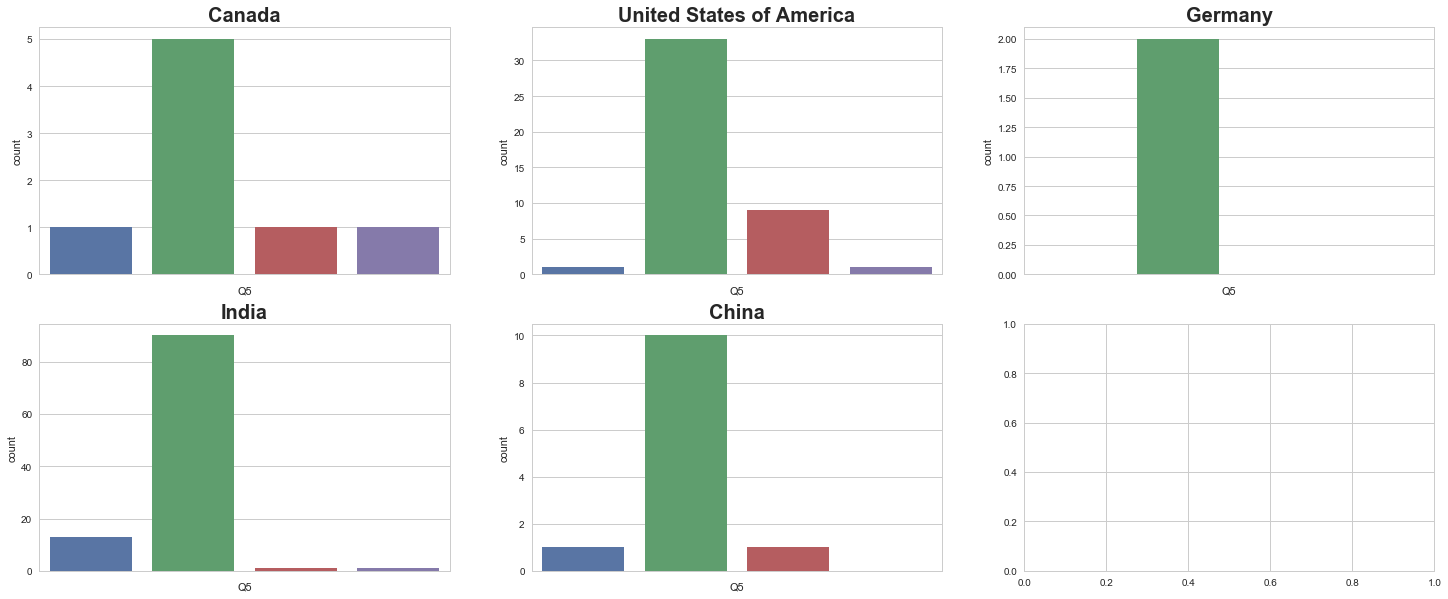

Q5. Which best describes your undergraduate major? - Selected Choice


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 Social sciences (anthropology, psychology, sociology, etc.)
2 Mathematics or statistics
3 Engineering (non-computer focused)
4 A business discipline (accounting, economics, finance, etc.)
5 Computer science (software engineering, etc.)


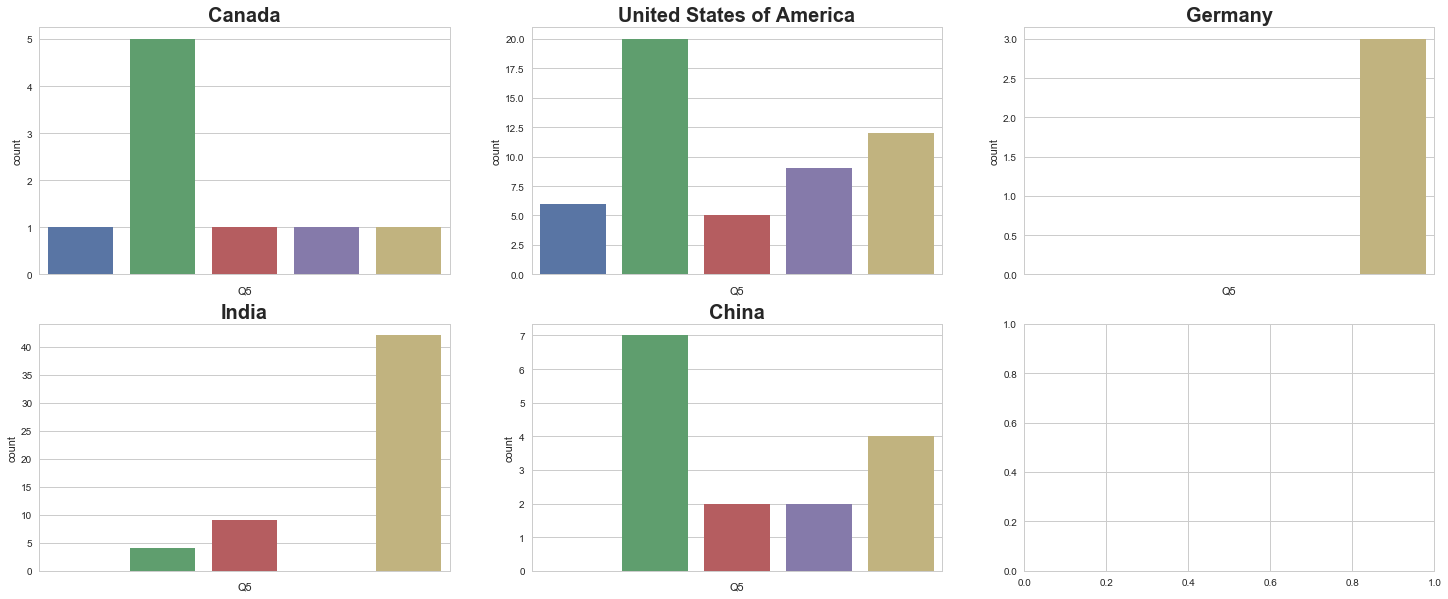

Q5. Which best describes your undergraduate major? - Selected Choice


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 A business discipline (accounting, economics, finance, etc.)
2 Engineering (non-computer focused)
3 Computer science (software engineering, etc.)
4 Information technology, networking, or system administration
5 Mathematics or statistics
6 Environmental science or geology


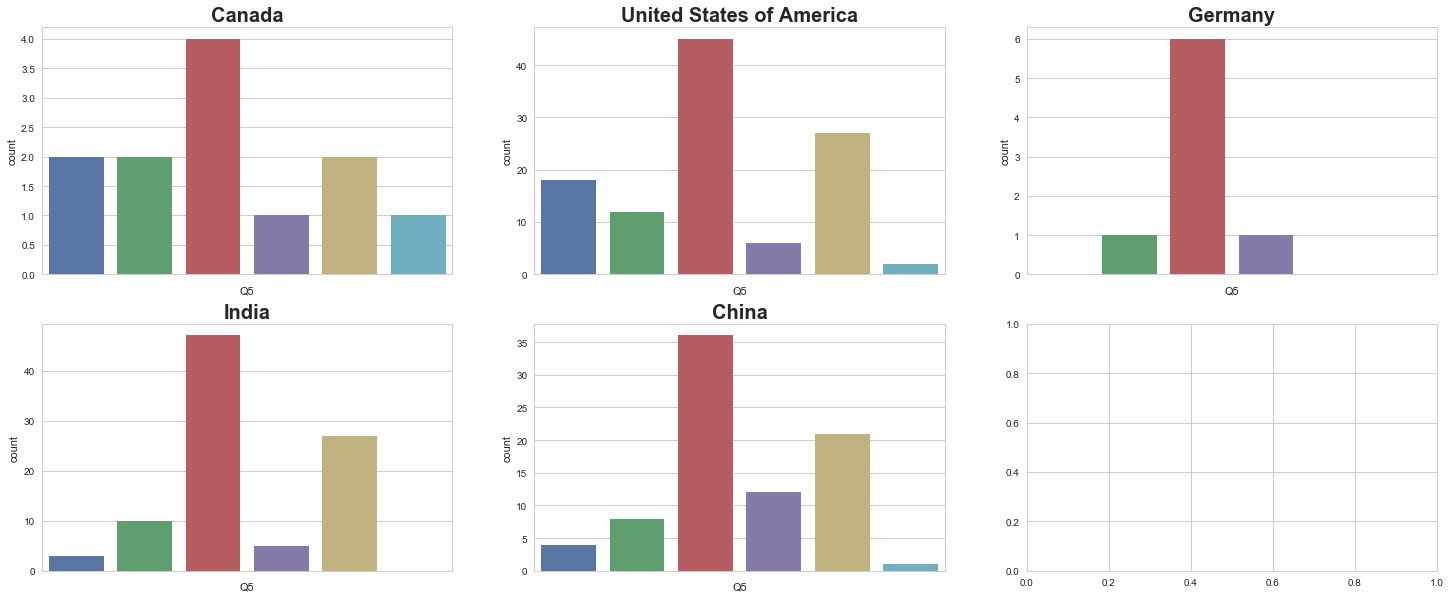

Q5. Which best describes your undergraduate major? - Selected Choice


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 Computer science (software engineering, etc.)
2 Humanities (history, literature, philosophy, etc.)
3 Mathematics or statistics
4 A business discipline (accounting, economics, finance, etc.)
5 Physics or astronomy
6 Engineering (non-computer focused)
7 Social sciences (anthropology, psychology, sociology, etc.)
8 Medical or life sciences (biology, chemistry, medicine, etc.)


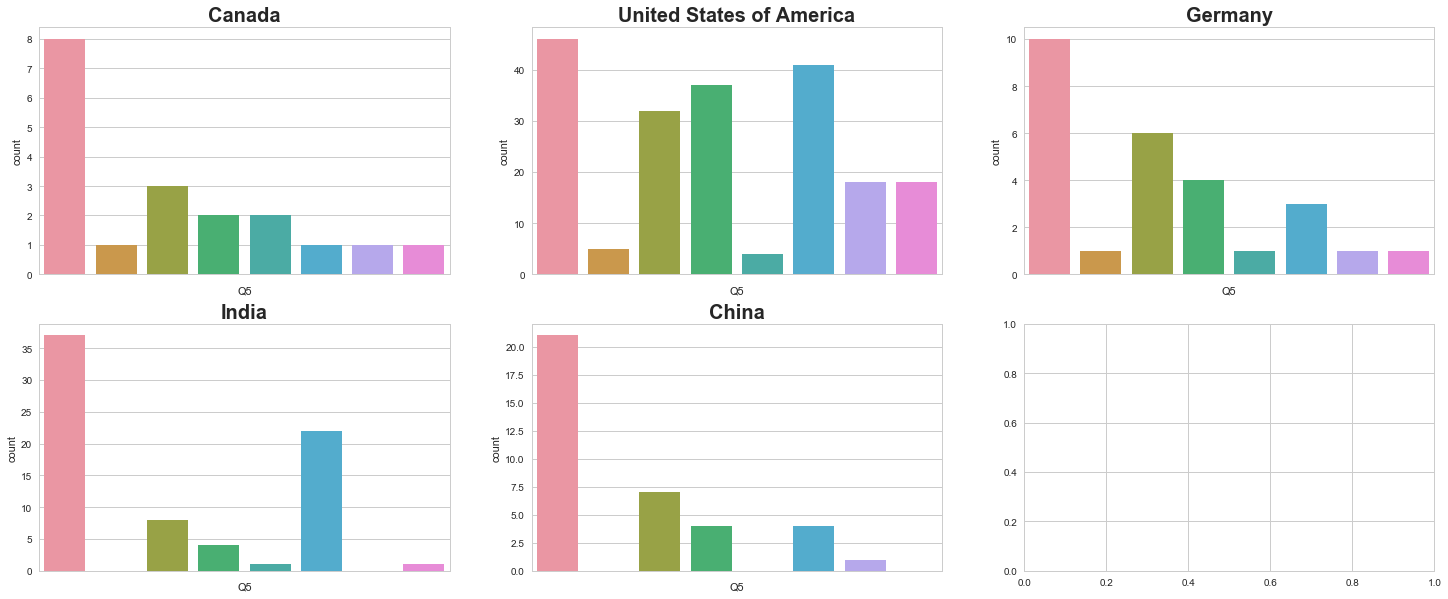

Q5. Which best describes your undergraduate major? - Selected Choice


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 Engineering (non-computer focused)
2 Mathematics or statistics
3 A business discipline (accounting, economics, finance, etc.)
4 Social sciences (anthropology, psychology, sociology, etc.)
5 Computer science (software engineering, etc.)
6 Medical or life sciences (biology, chemistry, medicine, etc.)


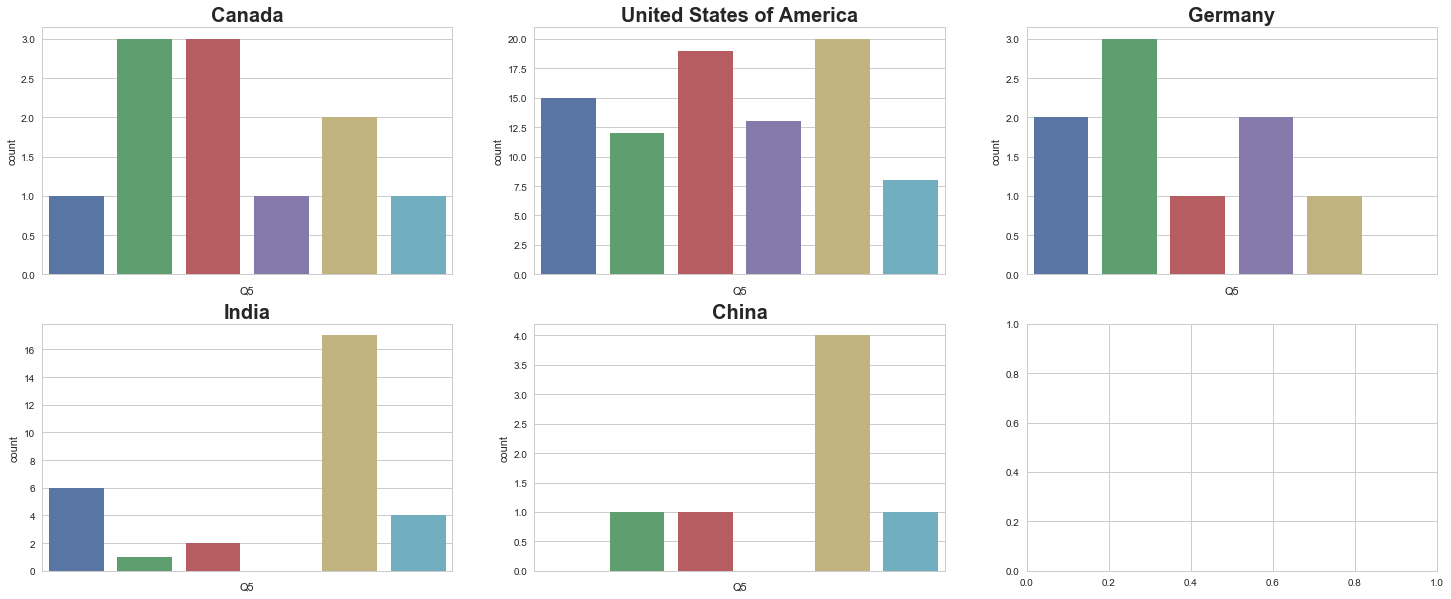

In [137]:
ks.draw_plot(5,dfs_=dfs_1)
ks.draw_plot(5,dfs_=dfs_2)
ks.draw_plot(5,dfs_=dfs_3)
ks.draw_plot(5,dfs_=dfs_4)
ks.draw_plot(5,dfs_=dfs_5)

Q5. Which best describes your undergraduate major? - Selected Choice


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 Physics or astronomy
2 Mathematics or statistics
3 Computer science (software engineering, etc.)
4 Other
5 Engineering (non-computer focused)
6 Information technology, networking, or system administration
7 Medical or life sciences (biology, chemistry, medicine, etc.)


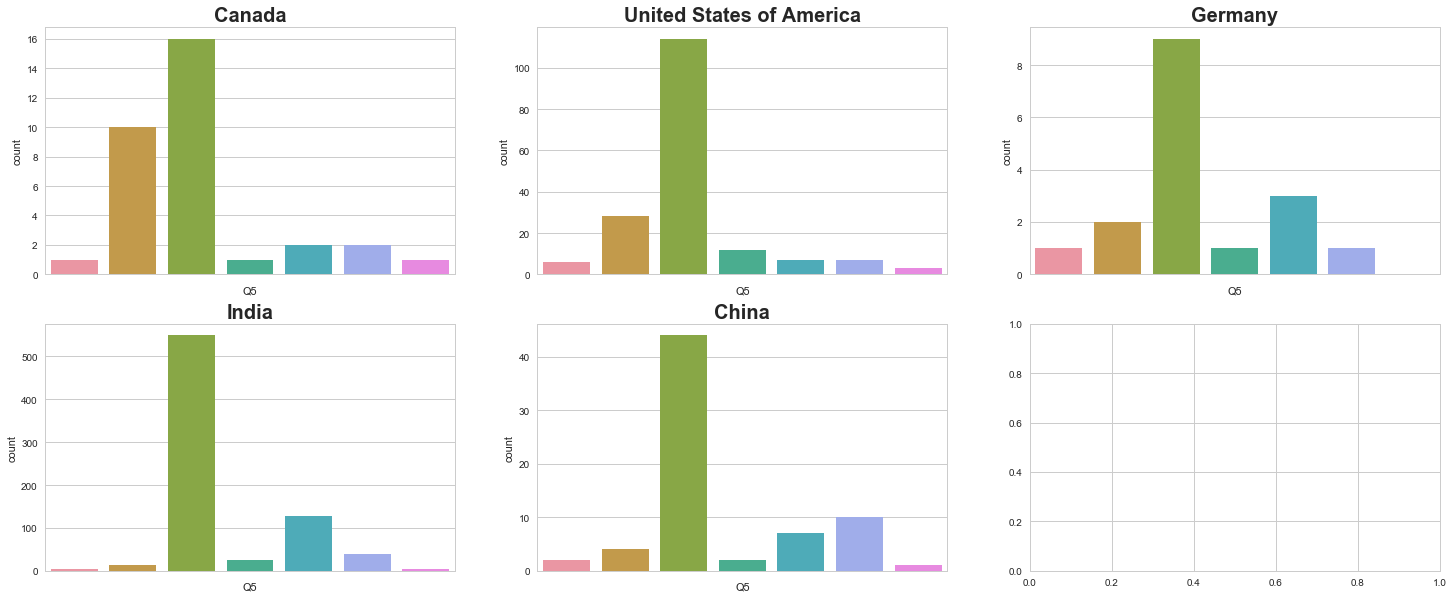

Q5. Which best describes your undergraduate major? - Selected Choice


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 Engineering (non-computer focused)
2 Computer science (software engineering, etc.)
3 Mathematics or statistics
4 A business discipline (accounting, economics, finance, etc.)
5 Information technology, networking, or system administration
6 Physics or astronomy
7 Other
8 Environmental science or geology


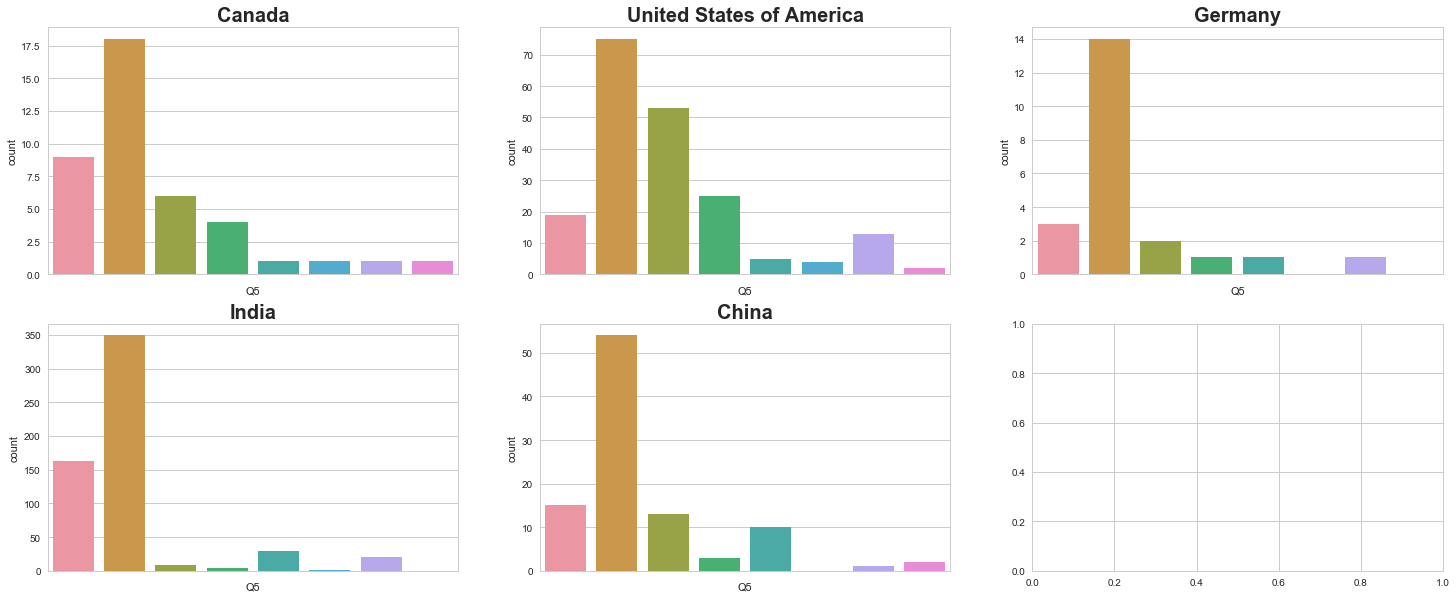

Q5. Which best describes your undergraduate major? - Selected Choice


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 Medical or life sciences (biology, chemistry, medicine, etc.)
2 Computer science (software engineering, etc.)
3 A business discipline (accounting, economics, finance, etc.)
4 Engineering (non-computer focused)
5 Mathematics or statistics
6 Physics or astronomy


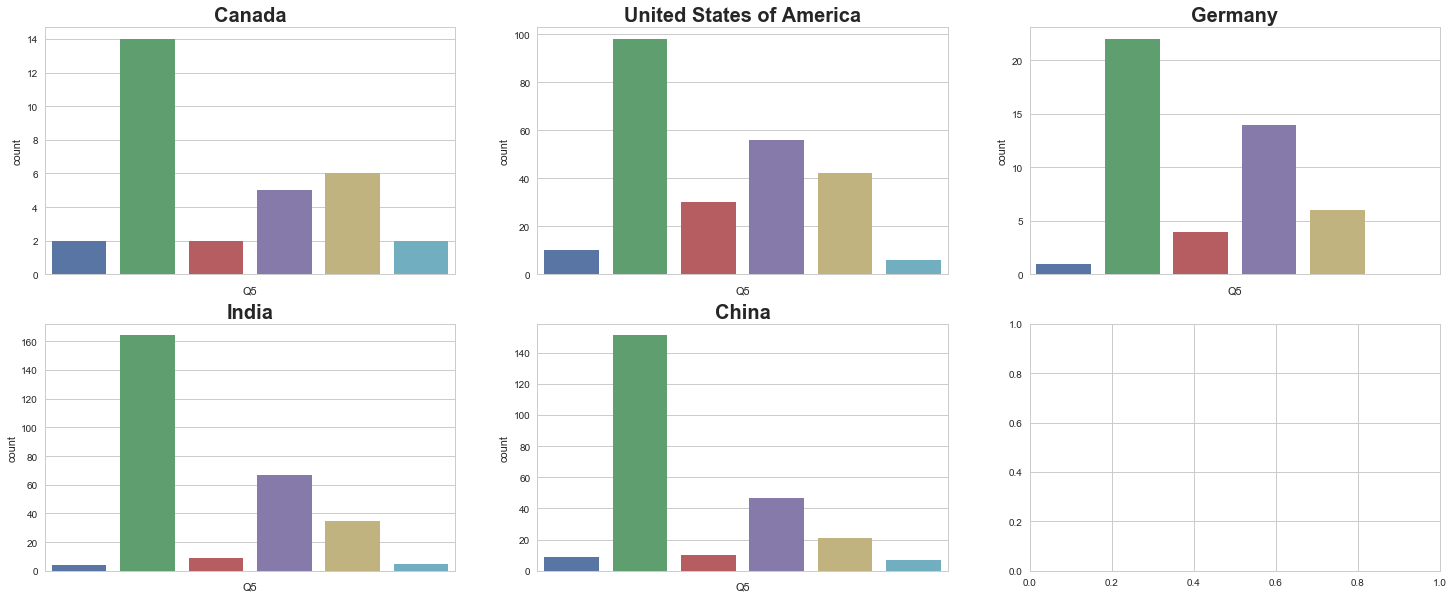

Q5. Which best describes your undergraduate major? - Selected Choice


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 Computer science (software engineering, etc.)
2 Engineering (non-computer focused)
3 Medical or life sciences (biology, chemistry, medicine, etc.)
4 A business discipline (accounting, economics, finance, etc.)
5 Mathematics or statistics
6 Other
7 Social sciences (anthropology, psychology, sociology, etc.)
8 Environmental science or geology
9 Physics or astronomy
10 Humanities (history, literature, philosophy, etc.)
11 Information technology, networking, or system administration


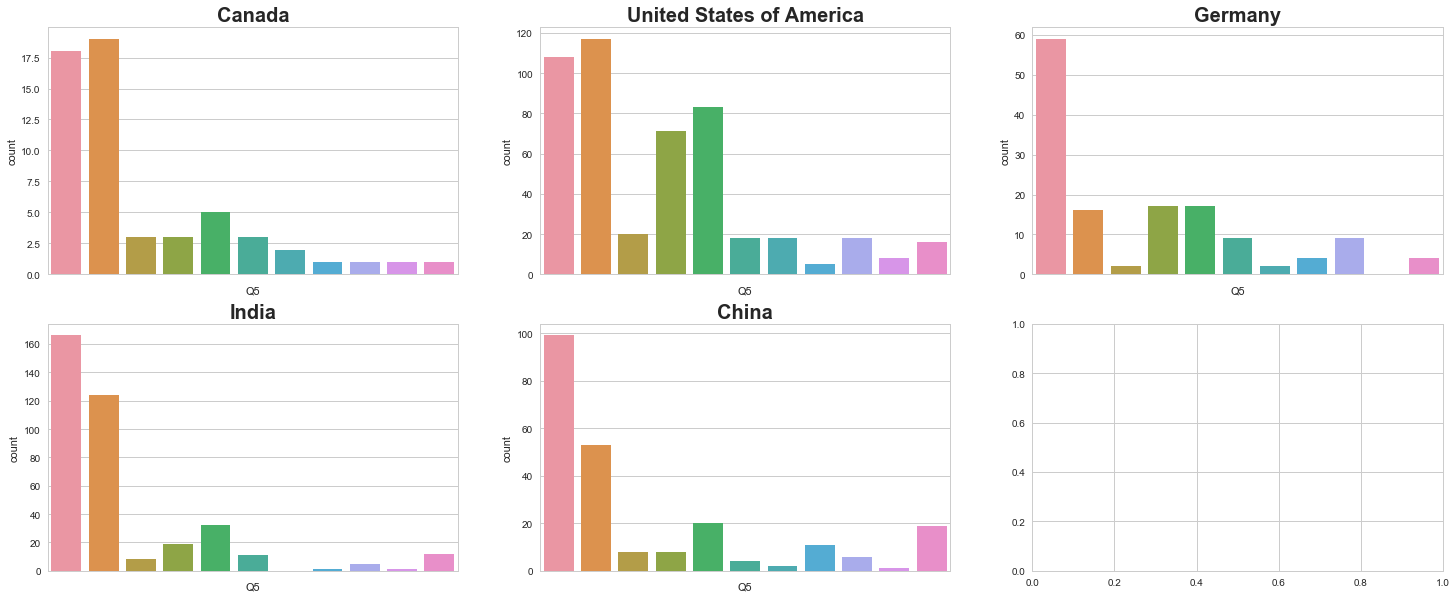

Q5. Which best describes your undergraduate major? - Selected Choice


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 Medical or life sciences (biology, chemistry, medicine, etc.)
2 Mathematics or statistics
3 Information technology, networking, or system administration
4 Physics or astronomy
5 A business discipline (accounting, economics, finance, etc.)
6 Engineering (non-computer focused)
7 Computer science (software engineering, etc.)
8 Other
9 Environmental science or geology


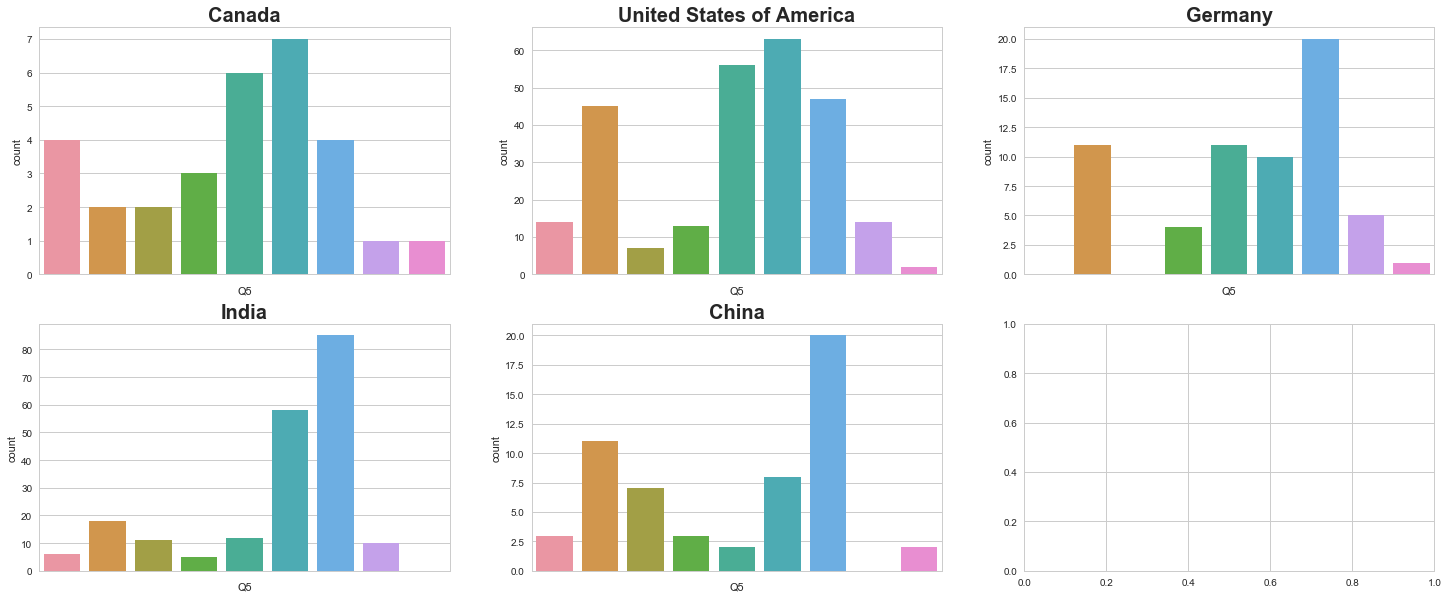

In [138]:
ks.draw_plot(5,dfs_=dfs_6)
ks.draw_plot(5,dfs_=dfs_7)
ks.draw_plot(5,dfs_=dfs_8)
ks.draw_plot(5,dfs_=dfs_9)
ks.draw_plot(5,dfs_=dfs_10)

In [ ]:
def dfs_by_criterias_1(age="", edu=""):
    dfs = {}
    for i in country:
        dfs[i] = df[(df['Q2']==age)&(df['Q4']==edu)]
    return dfs

In [150]:
df_1 = df[(df['Q2']=="18-21")&(df['Q4']=="Bachelor’s degree")]
df_2 = df[(df['Q2']=="22-24")&(df['Q4']=="Bachelor’s degree")]
df_3 = df[(df['Q2']=="25-29")&(df['Q4']=="Bachelor’s degree")]
df_4 = df[(df['Q2']=="30-34")&(df['Q4']=="Bachelor’s degree")]

df_5 = df[(df['Q2']=="22-24")&(df['Q4']=="Master’s degree")]
df_6 = df[(df['Q2']=="25-29")&(df['Q4']=="Master’s degree")]
df_7 = df[(df['Q2']=="30-34")&(df['Q4']=="Master’s degree")]
df_8 = df[(df['Q2']=="35-39")&(df['Q4']=="Master’s degree")]

df_9 = df[(df['Q2']=="25-29")&(df['Q4']=="Doctoral degree")]
df_10 = df[(df['Q2']=="30-34")&(df['Q4']=="Doctoral degree")]
df_11 = df[(df['Q2']=="35-39")&(df['Q4']=="Doctoral degree")]
df_12 = df[(df['Q2']=="40-44")&(df['Q4']=="Doctoral degree")]

In [151]:
dfs = {
    "Bachelor_18-21":df_1,
    "Bachelor_22-24":df_2,
    "Bachelor_25-29":df_3,
    "Bachelor_30-34":df_4,
    "Master_22-24":df_5,
    "Master_25-29":df_6,
    "Master_30-34":df_7,
    "Master_35-39":df_8,
    "Doctor_25-29":df_9,
    "Doctor_30-34":df_10,
    "Doctor_35-39":df_11,
    "Doctor_40-44":df_12}

In [159]:
df_count(dfs)

Bachelor_18-21 1896
Bachelor_22-24 1956
Bachelor_25-29 1449
Bachelor_30-34 759
Master_22-24 2592
Master_25-29 3470
Master_30-34 1792
Master_35-39 994
Doctor_25-29 767
Doctor_30-34 884
Doctor_35-39 574
Doctor_40-44 368


In [152]:
# 먼저 각을 잡고 몇가지 기준만 갖고 큼직하게 보고 특이점을 찾아서 안쪽으로 들어가야 한다
# **갖가지 기준의 세세한 모든 특이점을 다볼 수 없다
# 기준은 가장 로우하고 구체적이고 명확한 것을 기준으로 잡는다(ex. 국가, 나이, 성별)

Q5. Which best describes your undergraduate major? - Selected Choice


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 Computer science (software engineering, etc.)
2 Information technology, networking, or system administration
3 Engineering (non-computer focused)
4 Other
5 Mathematics or statistics
6 Physics or astronomy
7 Medical or life sciences (biology, chemistry, medicine, etc.)
8 A business discipline (accounting, economics, finance, etc.)
9 Social sciences (anthropology, psychology, sociology, etc.)
10 Environmental science or geology
11 I never declared a major
12 Fine arts or performing arts
13 Humanities (history, literature, philosophy, etc.)


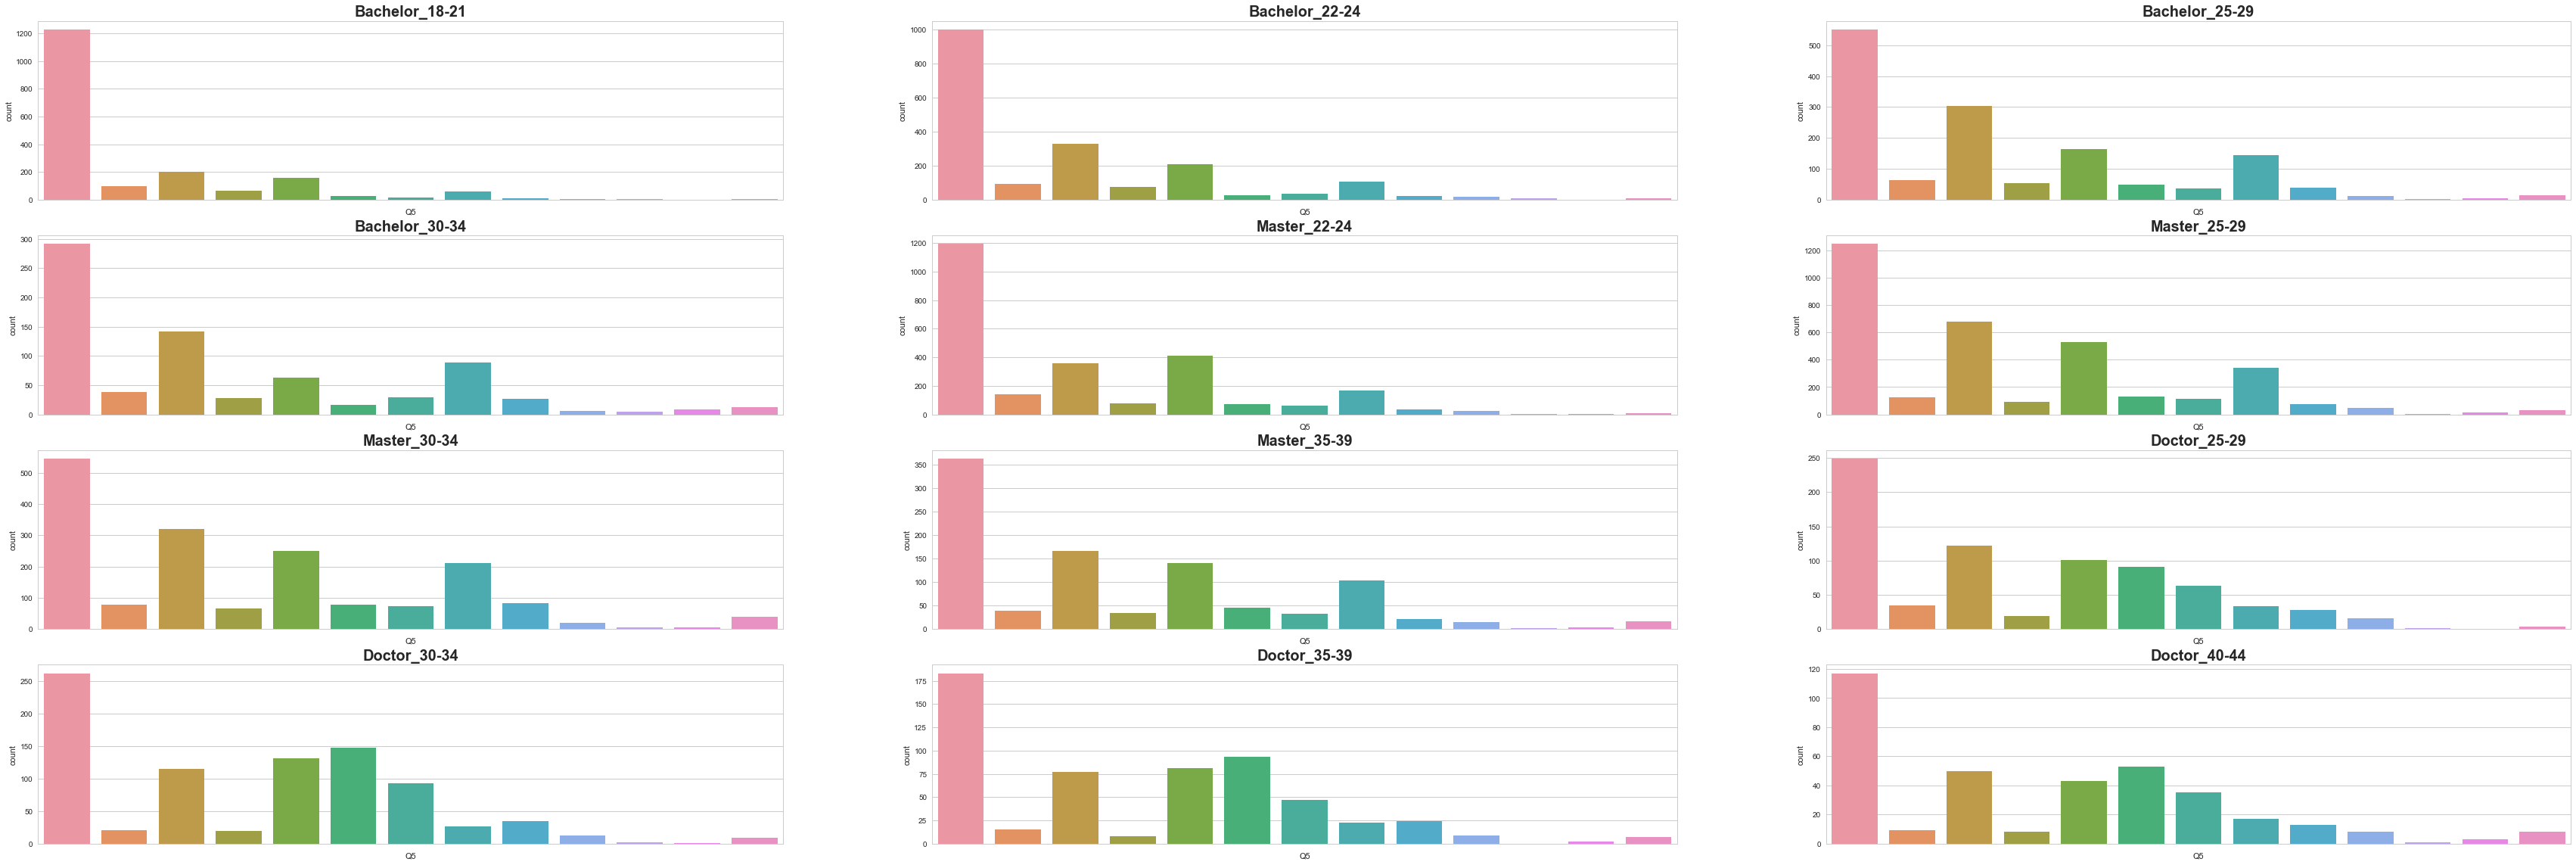

Q6. Select the title most similar to your current role (or most recent title if retired): - Selected Choice


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 Student
2 Data Scientist
3 Data Analyst
4 Research Assistant
5 Software Engineer
6 Business Analyst
7 Other
8 Not employed
9 Statistician
10 Data Engineer
11 Chief Officer
12 Research Scientist
13 Consultant
14 Salesperson
15 Developer Advocate
16 Product/Project Manager
17 Manager
18 Marketing Analyst


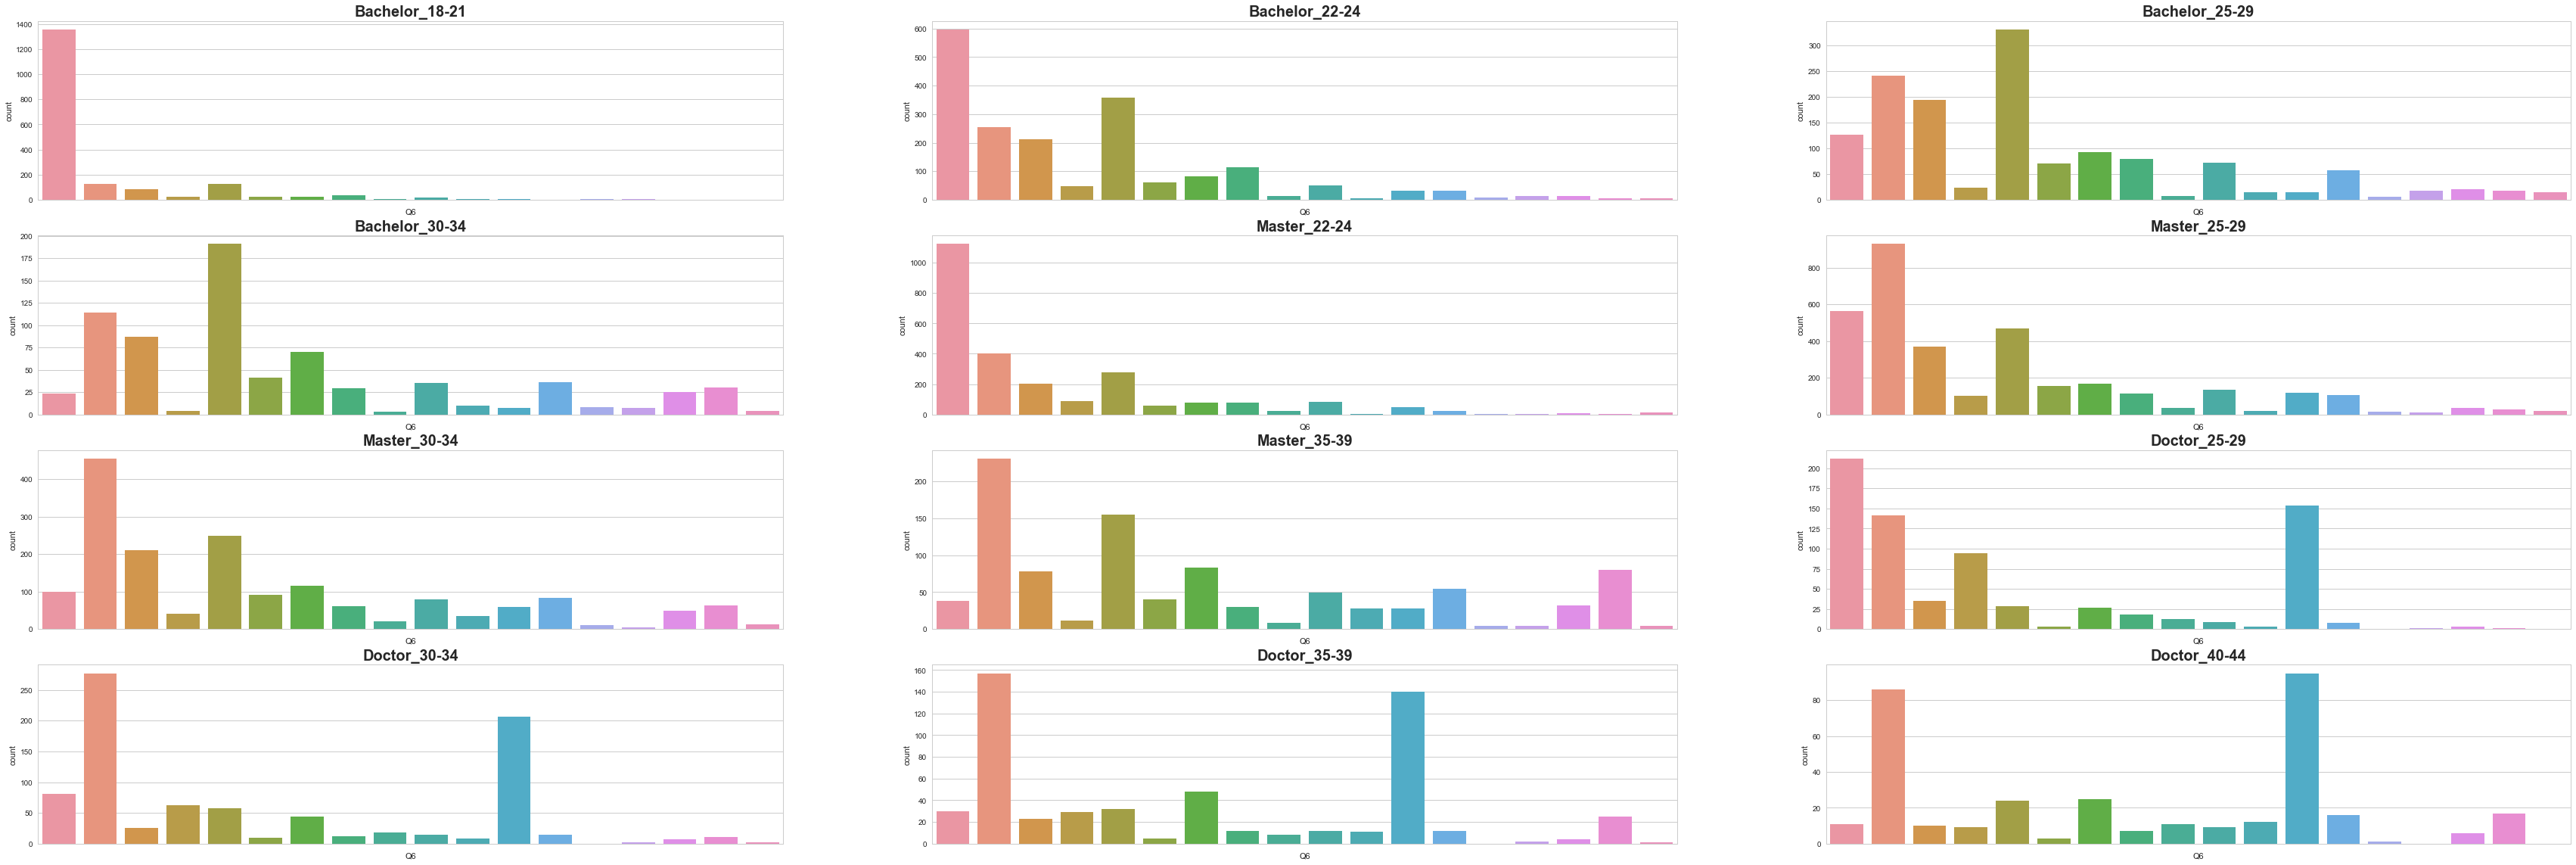

Q7. In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 I am a student
2 Medical/Pharmaceutical
3 Academics/Education
4 Computers/Technology
5 Accounting/Finance
6 Online Service/Internet-based Services
7 Shipping/Transportation
8 Military/Security/Defense
9 Marketing/CRM
10 Insurance/Risk Assessment
11 Hospitality/Entertainment/Sports
12 Other
13 Manufacturing/Fabrication
14 Retail/Sales
15 Government/Public Service
16 Online Business/Internet-based Sales
17 Broadcasting/Communications
18 Energy/Mining
19 Non-profit/Service


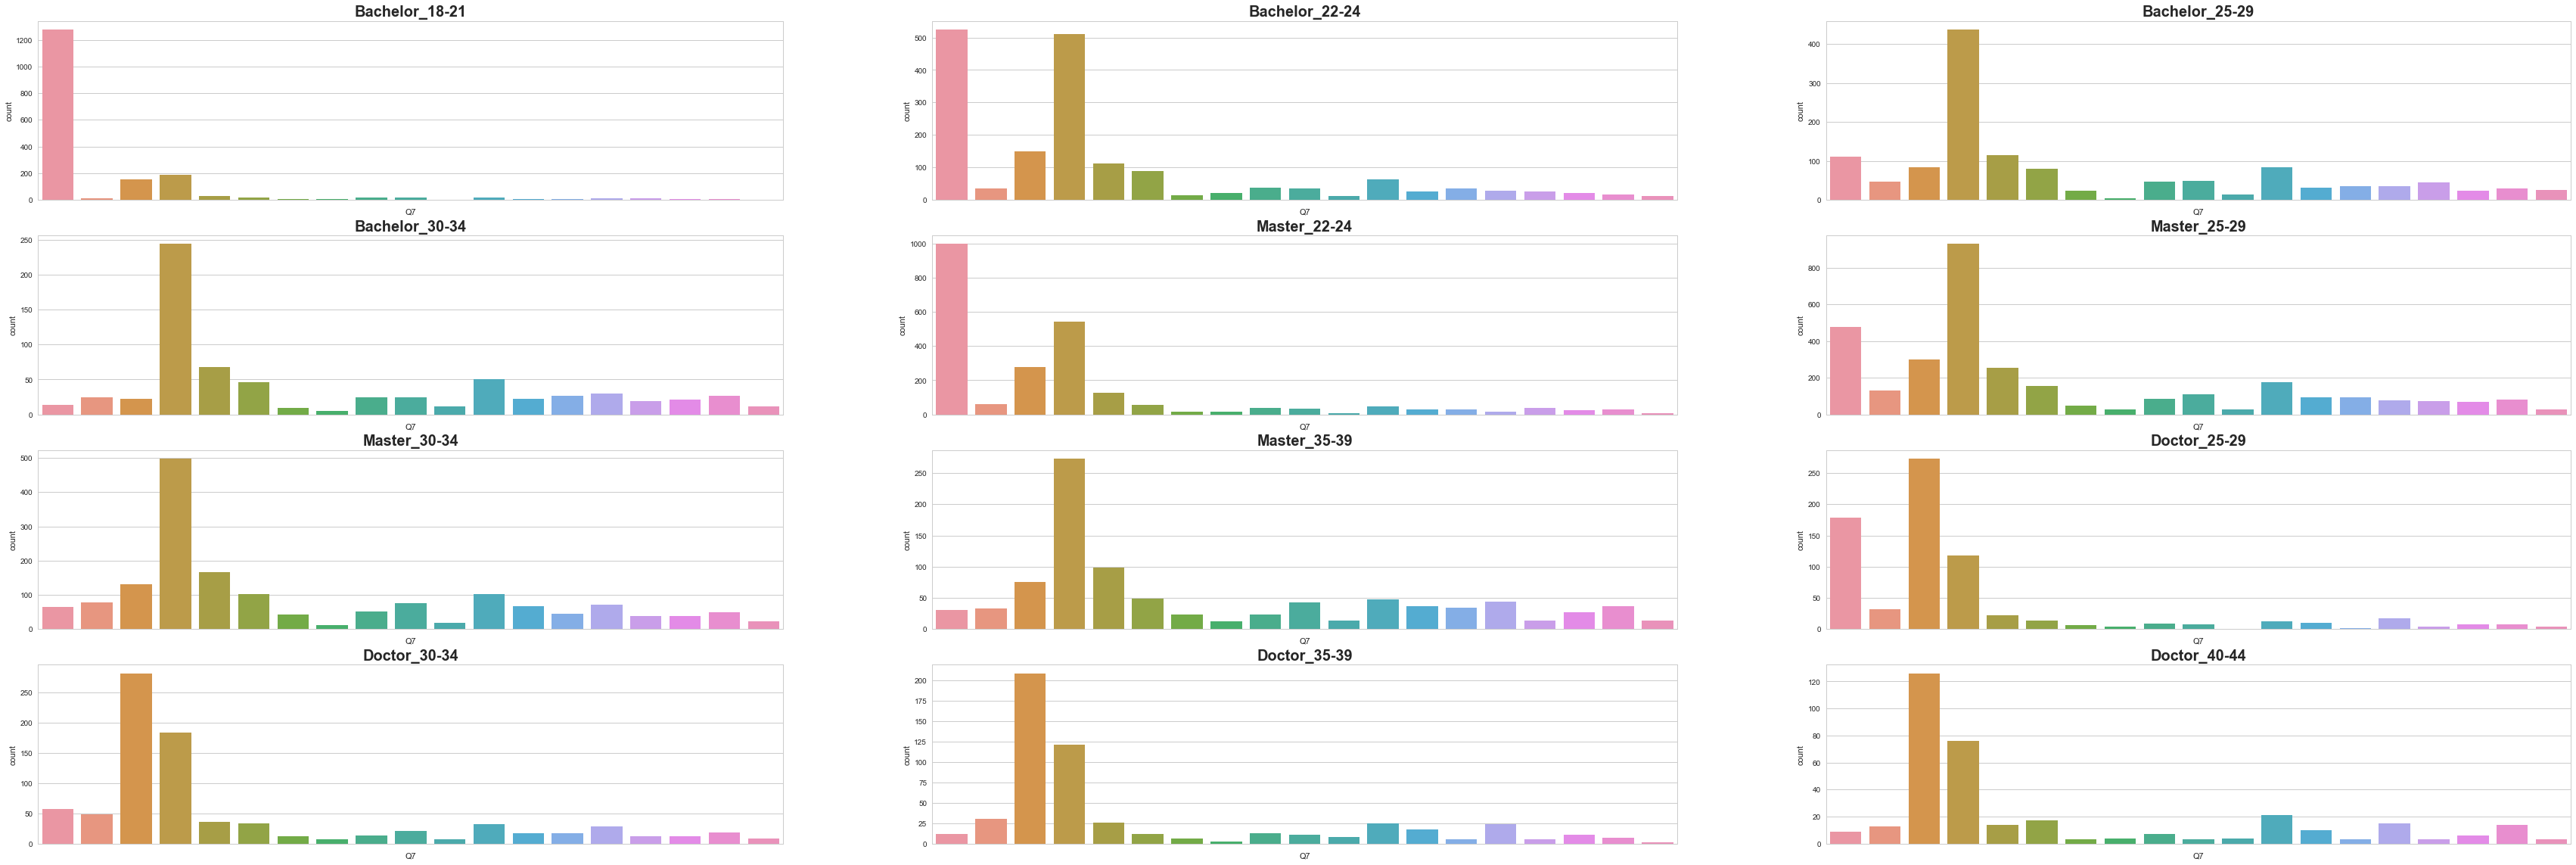

Q9. What is your current yearly compensation (approximate $USD)?


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 0-10,000
2 50-60,000
3 I do not wish to disclose my approximate yearly compensation
4 10-20,000
5 20-30,000
6 70-80,000
7 125-150,000
8 200-250,000
9 40-50,000
10 80-90,000
11 30-40,000
12 90-100,000
13 60-70,000
14 100-125,000
15 500,000+
16 250-300,000


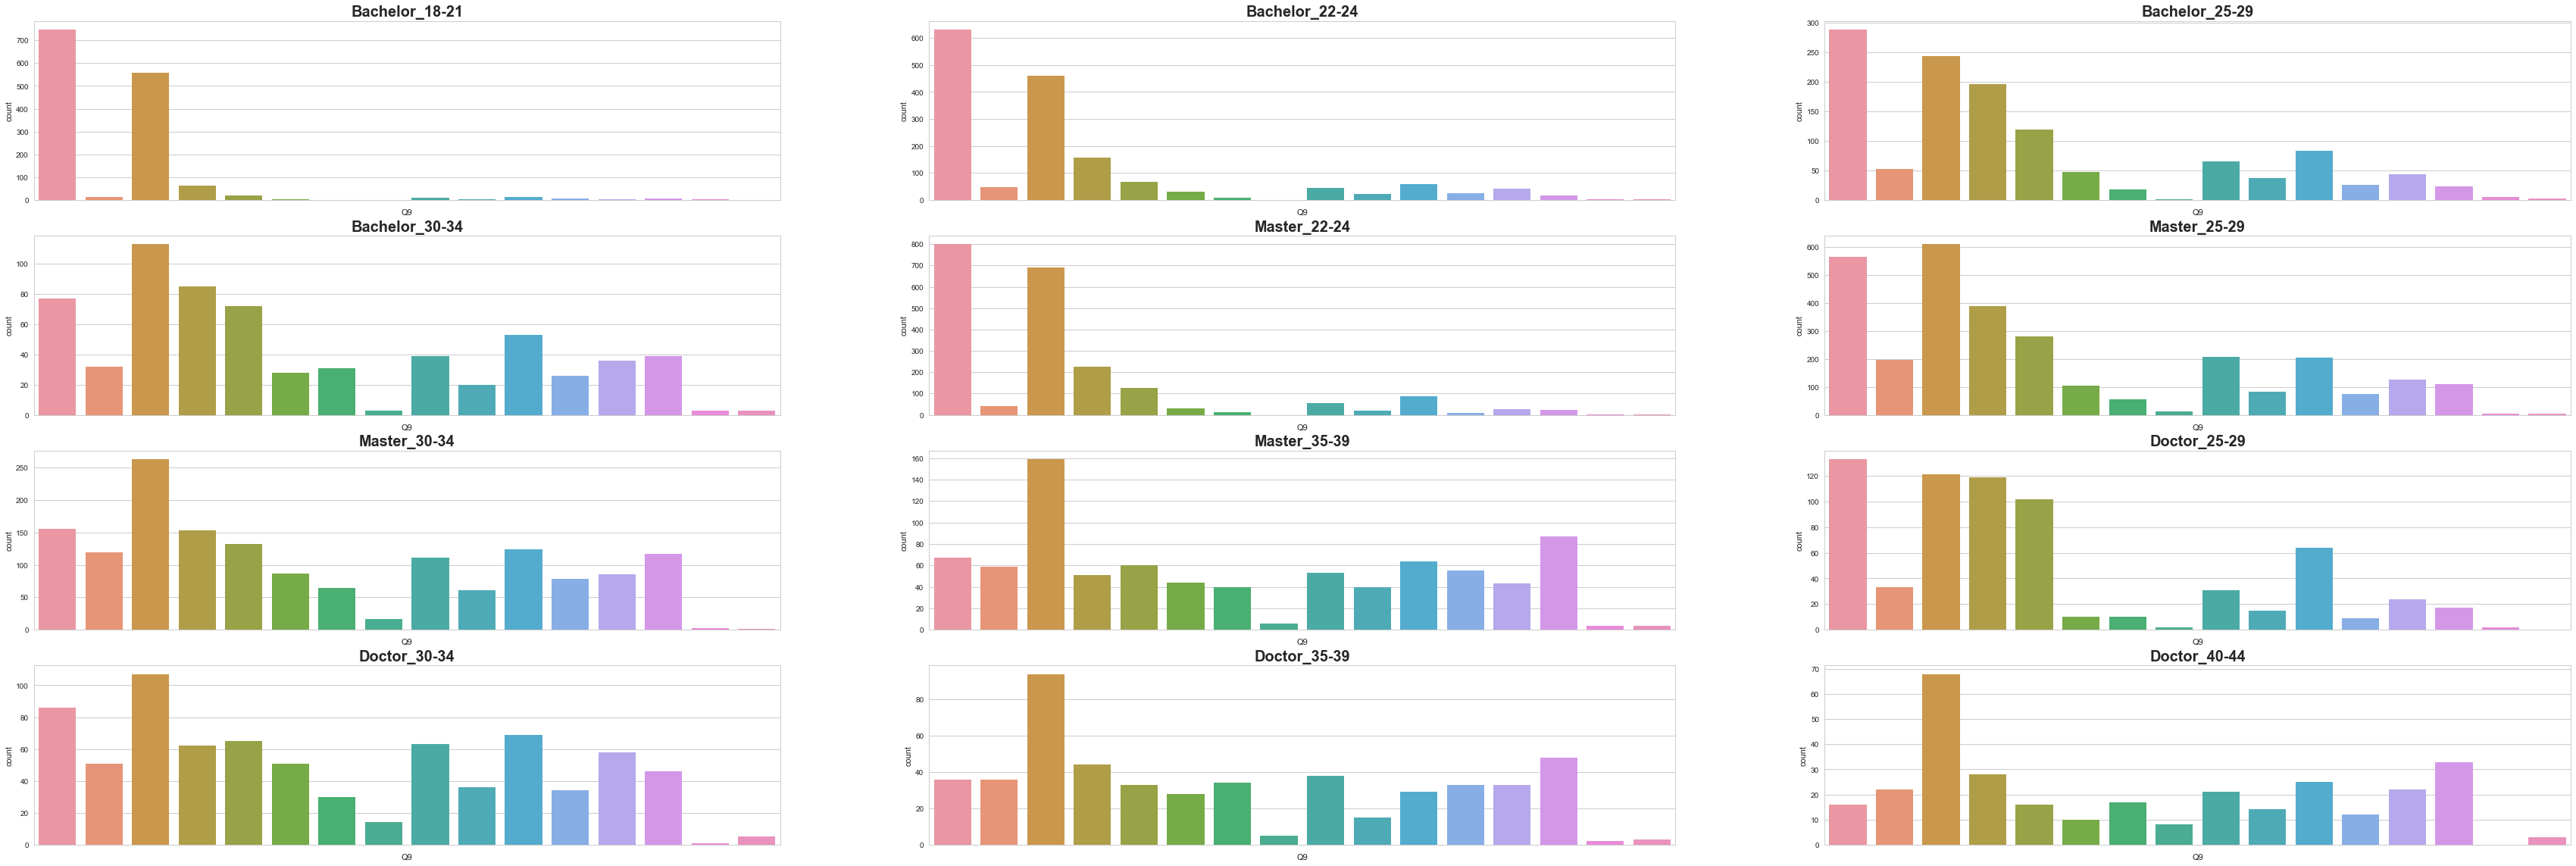

In [154]:
ks.draw_plot(5, dfs_=dfs) # 특이점 없음
ks.draw_plot(6, dfs_=dfs) # ★★★
ks.draw_plot(7, dfs_=dfs) # 특이점 없음
ks.draw_plot(9, dfs_=dfs) # 특이점 없음

Q17. What specific programming language do you use most often? - Selected Choice


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 Python
2 R
3 C/C++
4 Java
5 MATLAB
6 Javascript/Typescript
7 C#/.NET
8 SQL
9 SAS/STATA
10 PHP
11 Bash
12 Julia
13 Other
14 Scala
15 Ruby


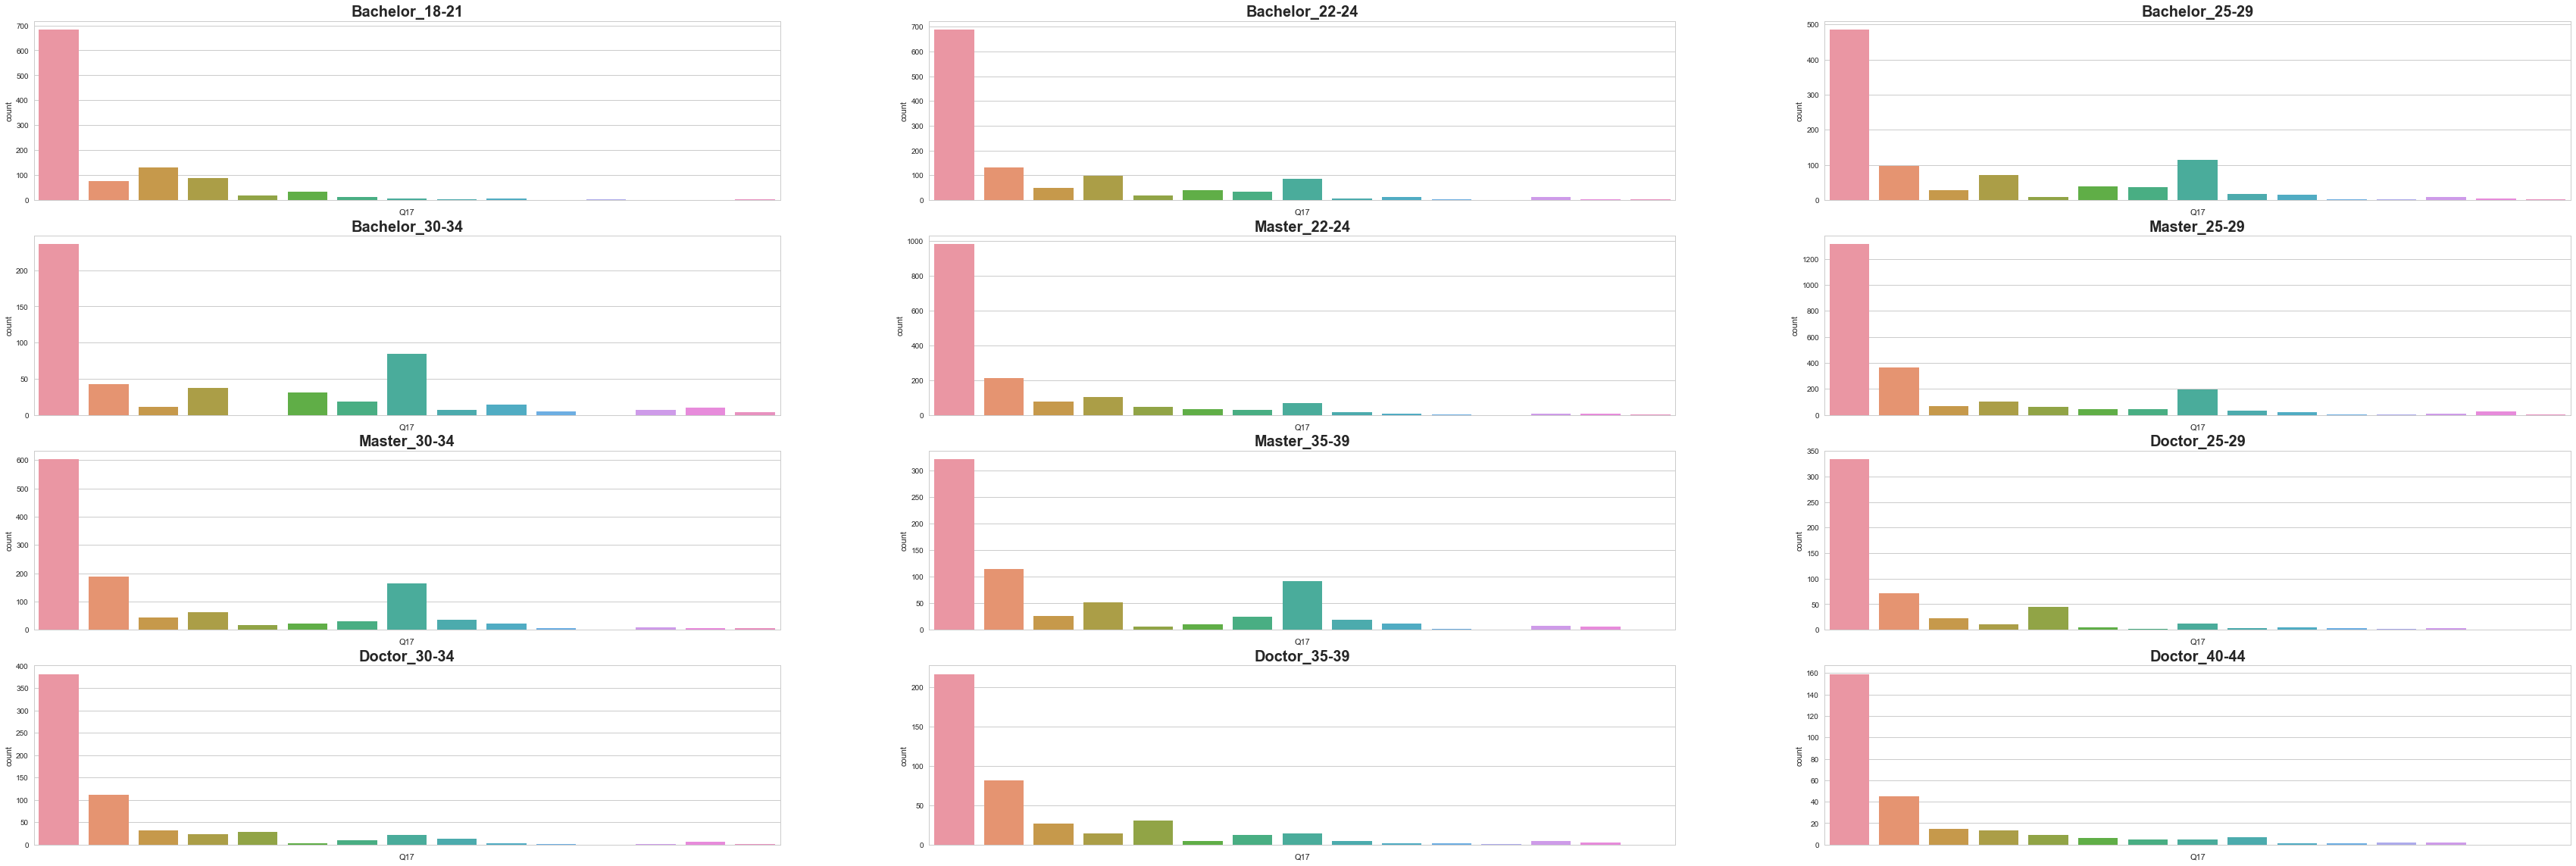

Q23. Approximately what percent of your time at work or school is spent actively coding?


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 50% to 74% of my time
2 25% to 49% of my time
3 1% to 25% of my time
4 75% to 99% of my time
5 0% of my time
6 100% of my time


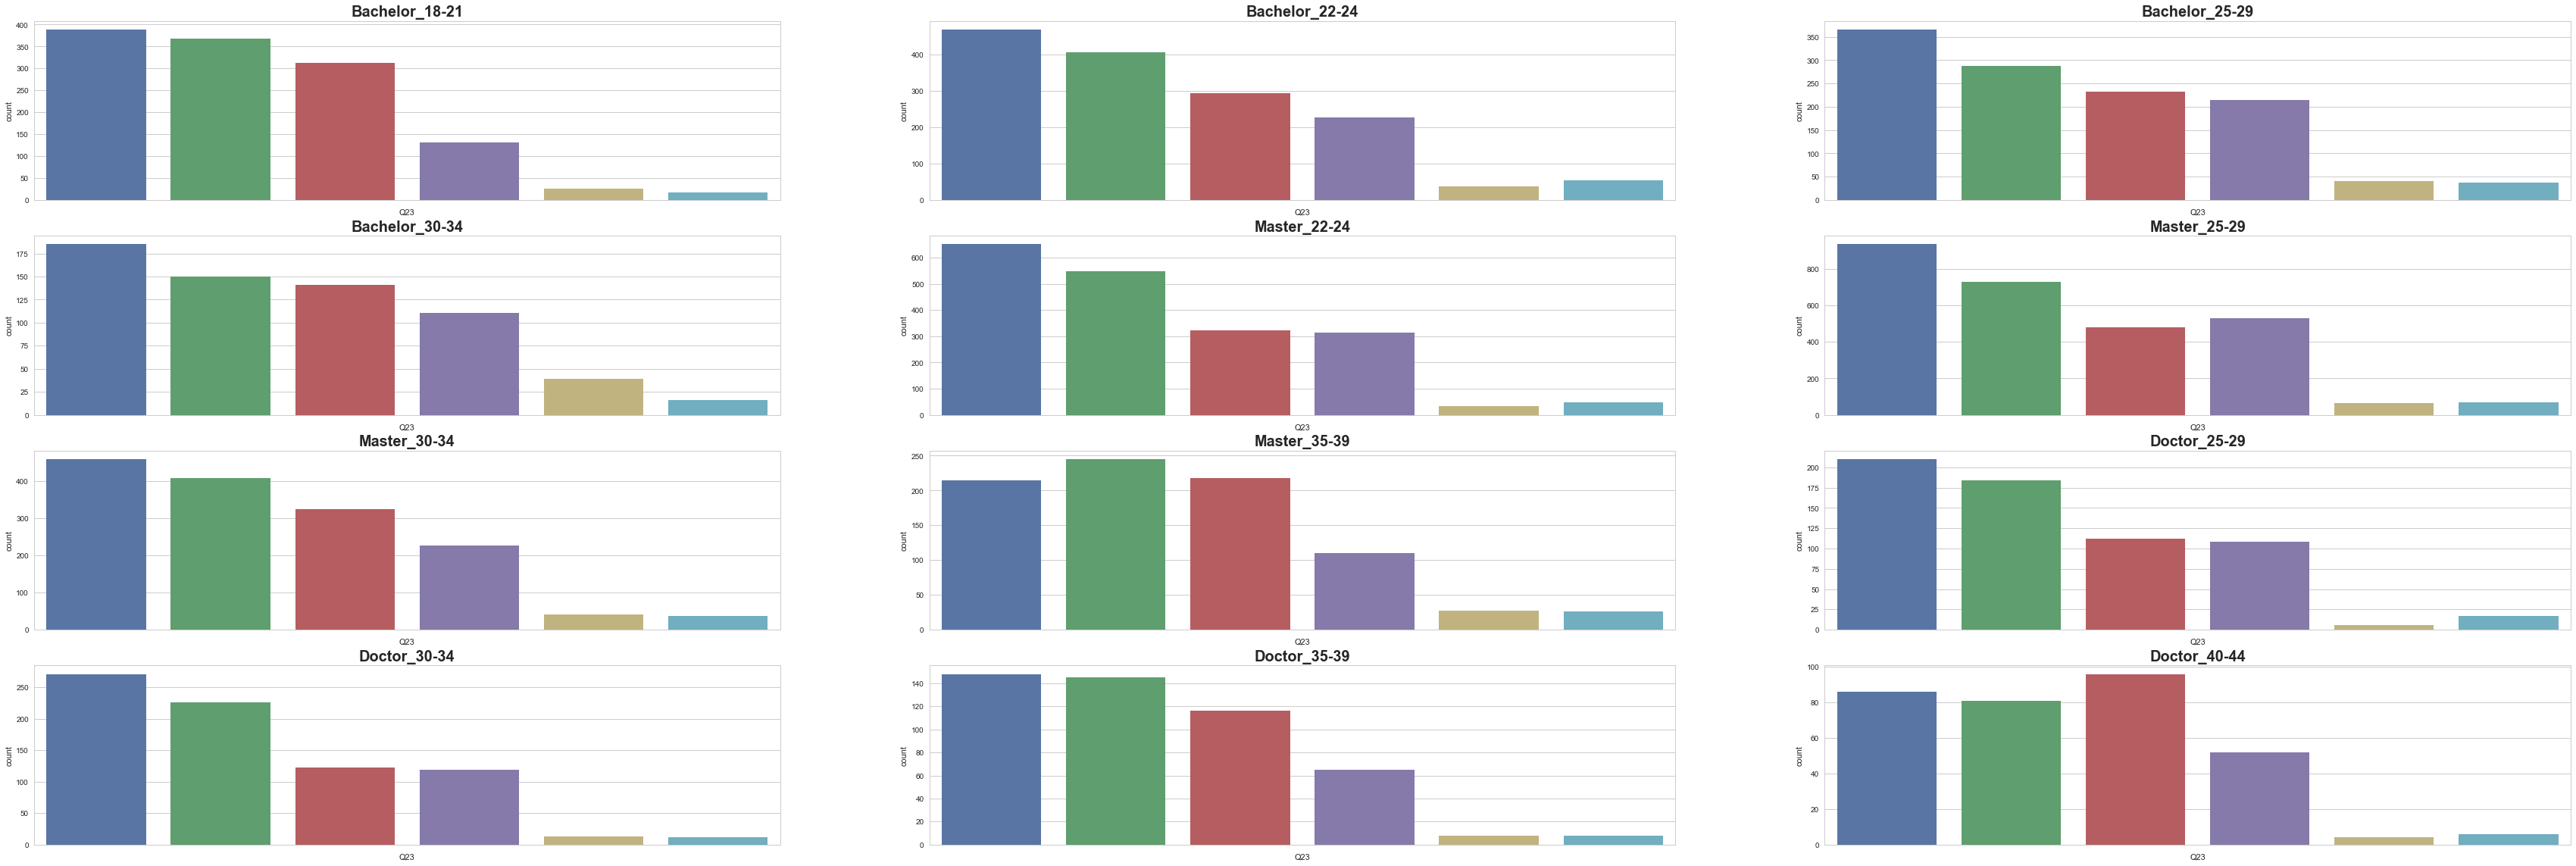

Q24. How long have you been writing code to analyze data?


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 < 1 year
2 3-5 years
3 1-2 years
4 I have never written code but I want to learn
5 5-10 years
6 I have never written code and I do not want to learn


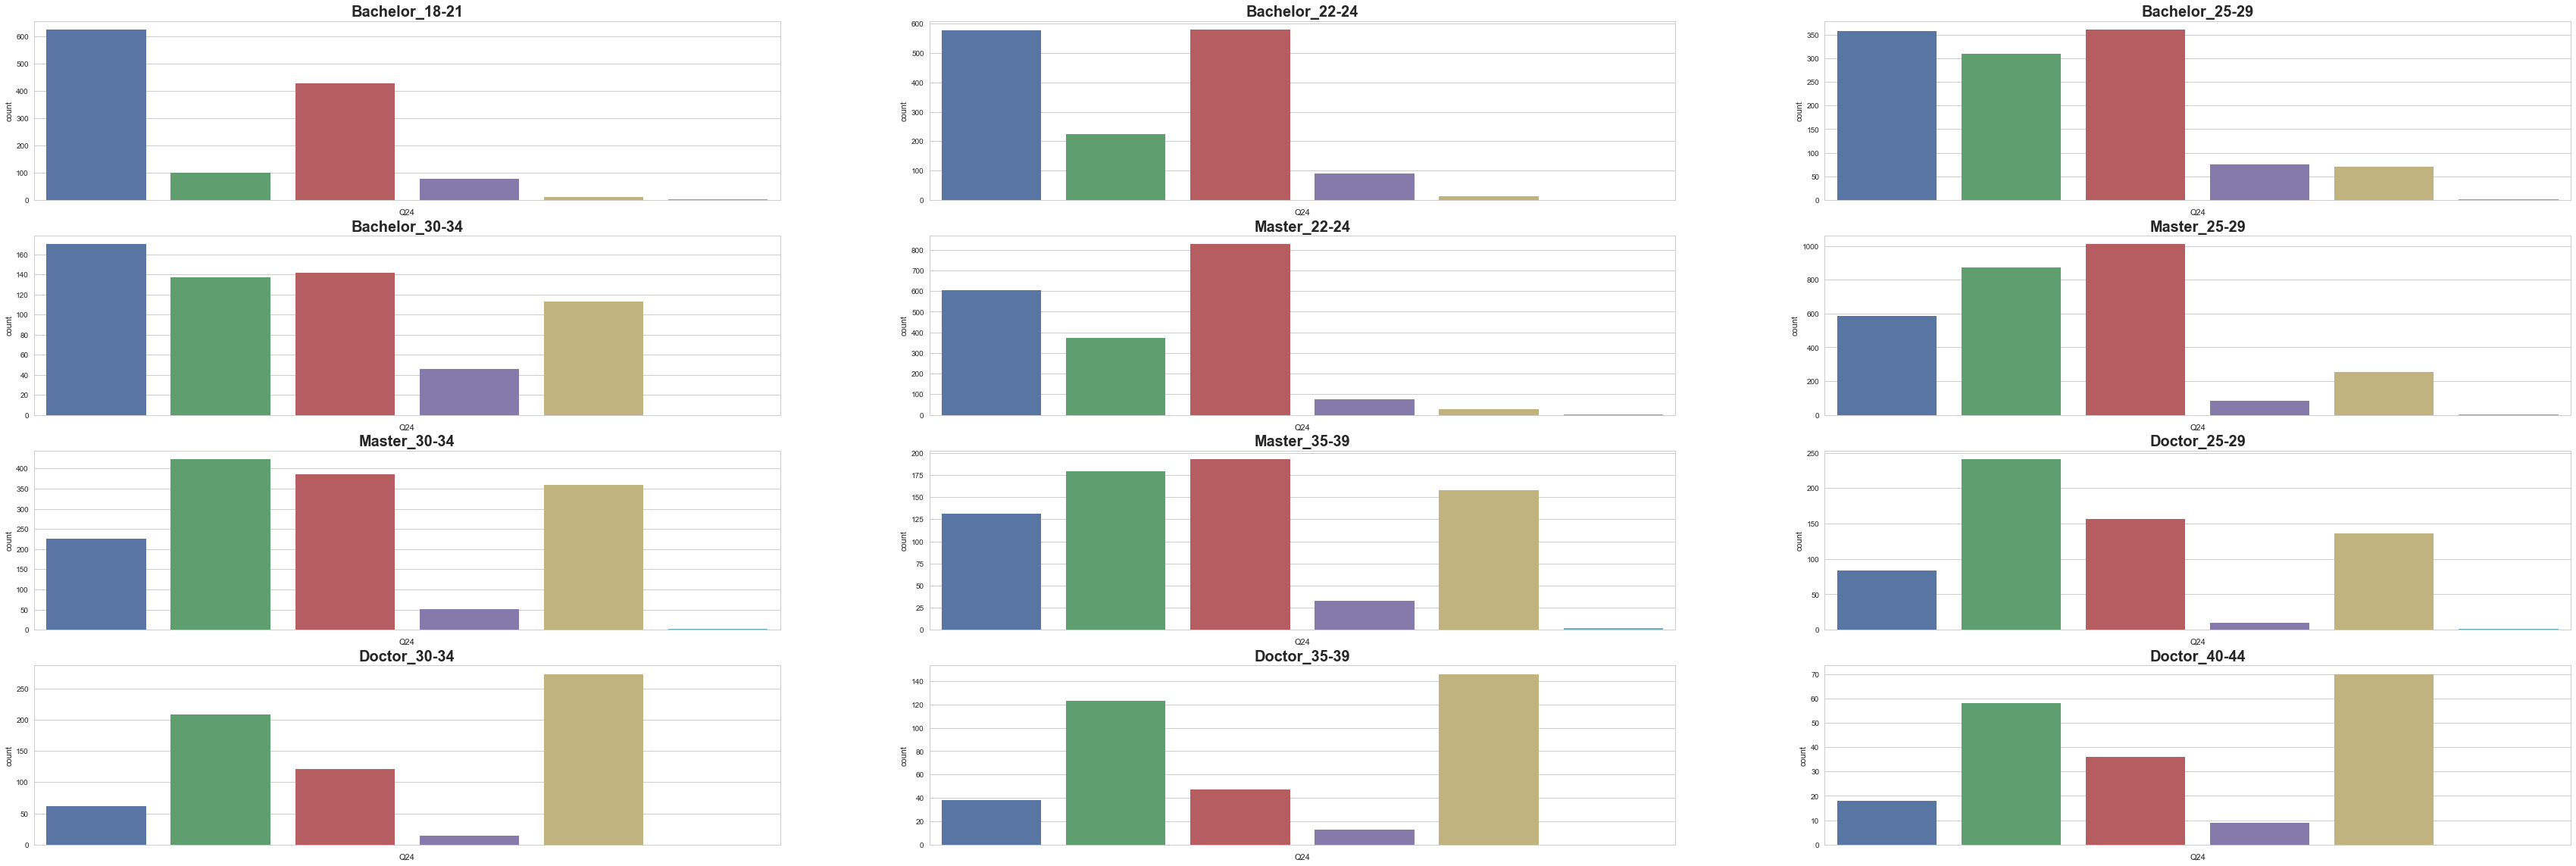

Q25. For how many years have you used machine learning methods (at work or in school)?


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 < 1 year
2 1-2 years
3 3-4 years
4 2-3 years
5 I have never studied machine learning but plan to learn in the future
6 I have never studied machine learning and I do not plan to
7 5-10 years
8 4-5 years


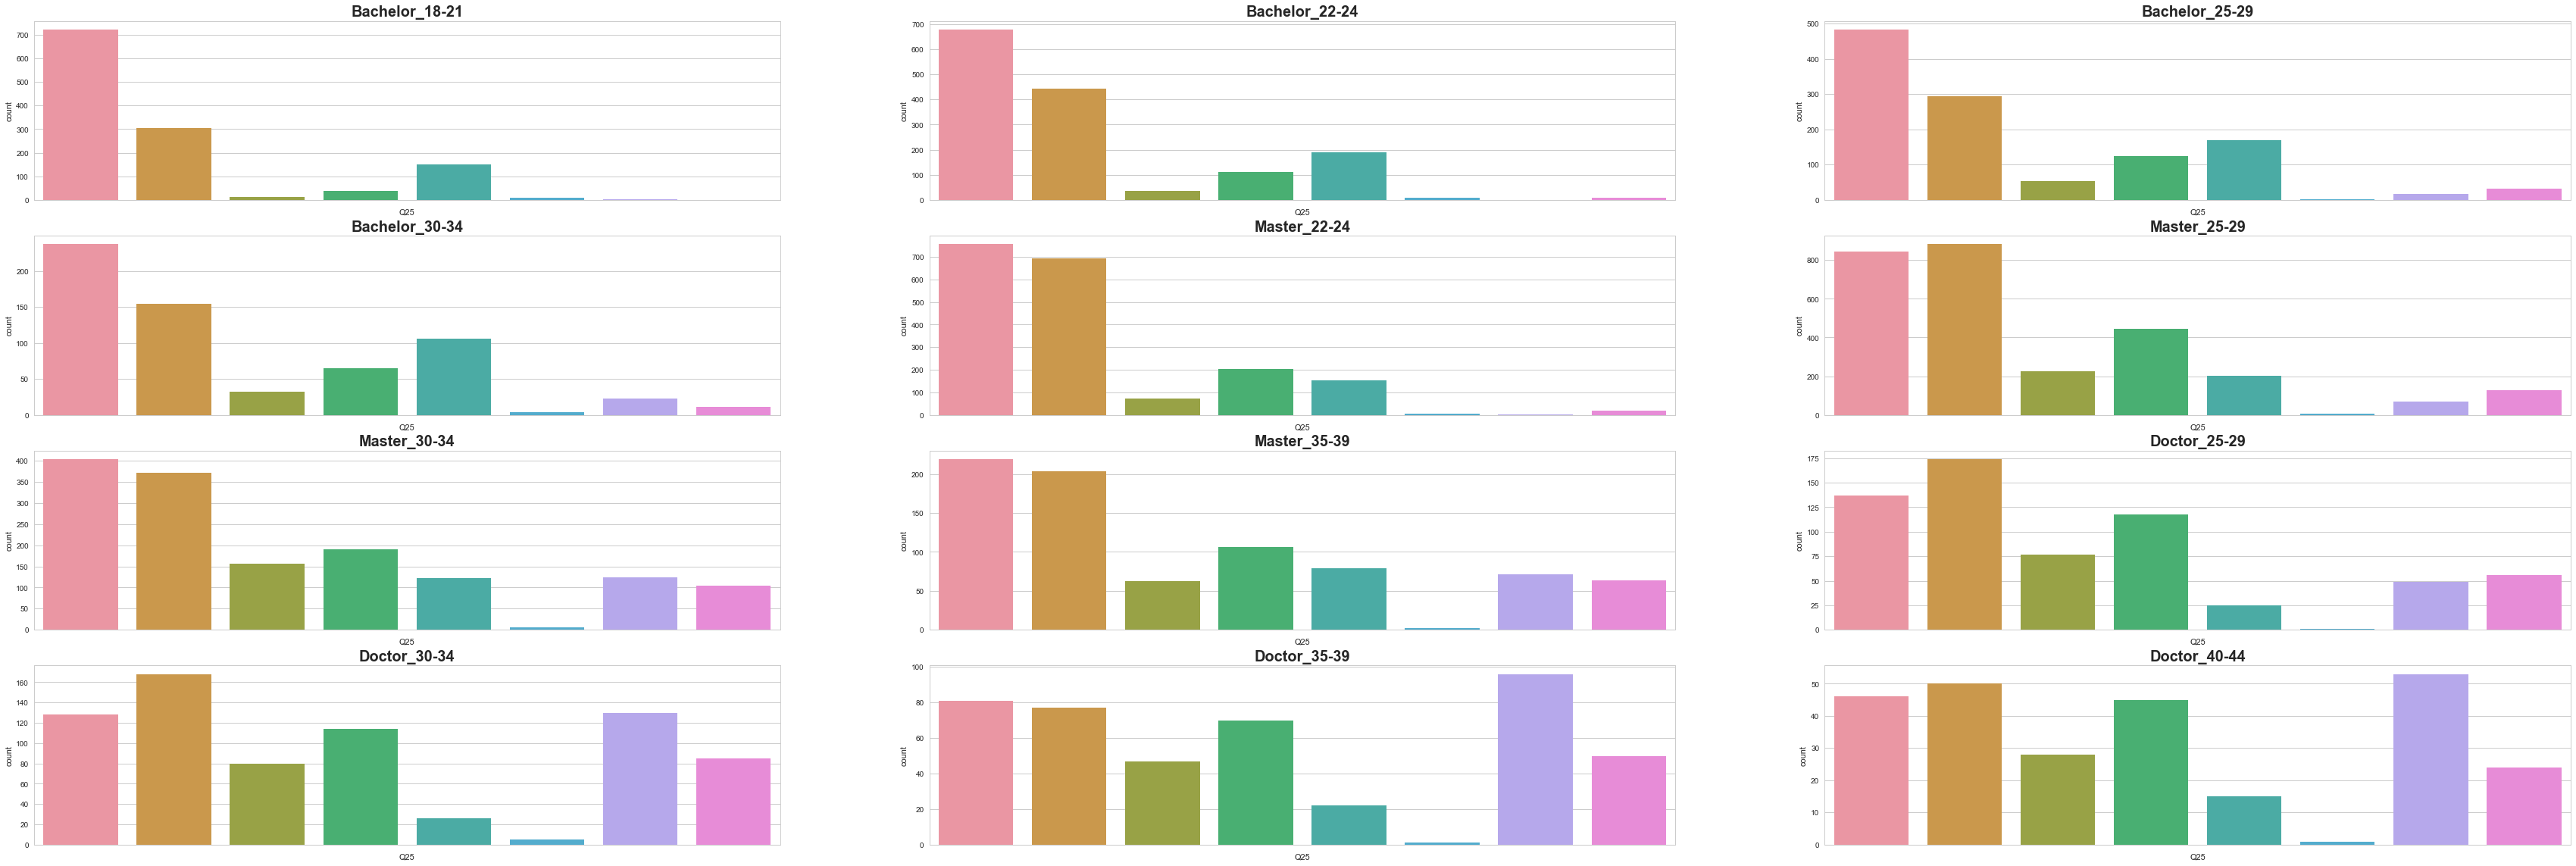

Q26. Do you consider yourself to be a data scientist?


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 Definitely not
2 Probably yes
3 Definitely yes
4 Probably not
5 Maybe


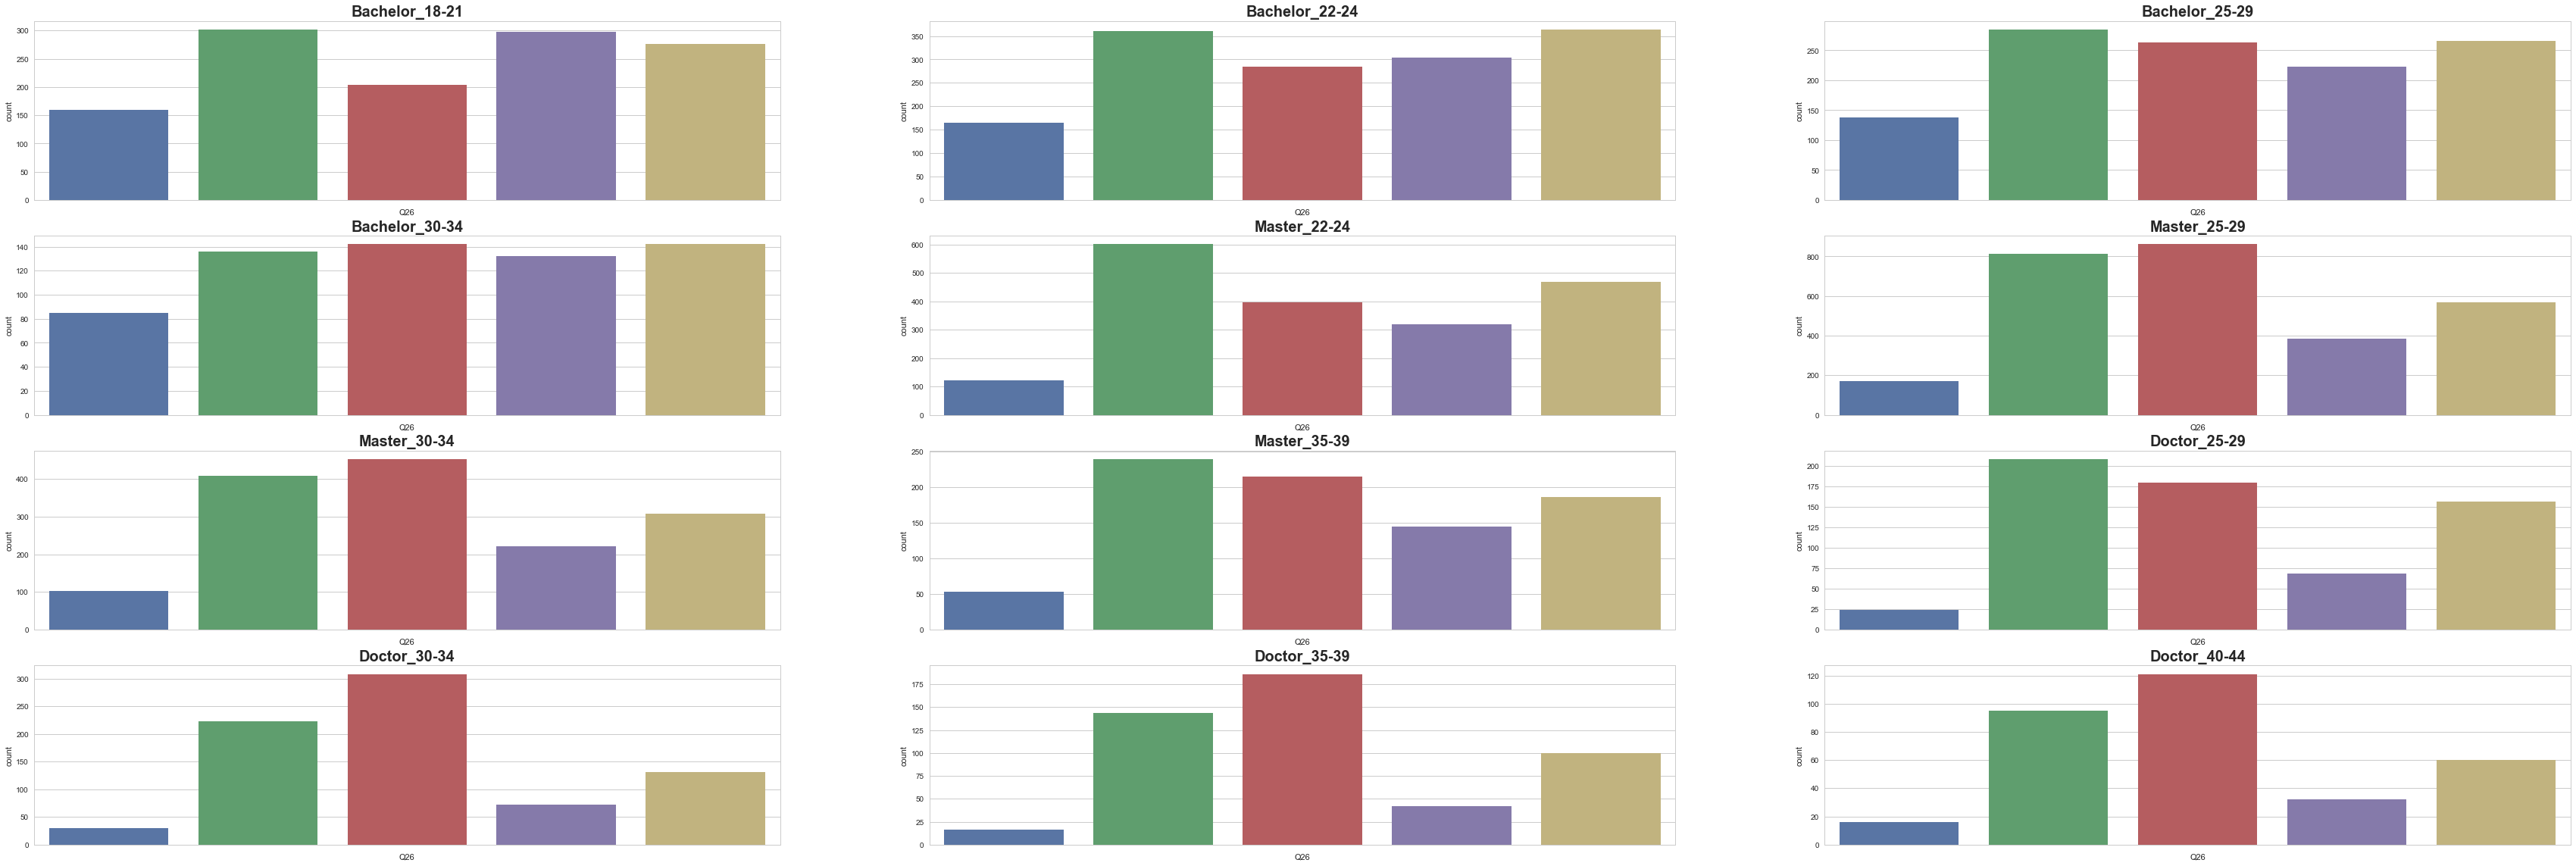

Q32. What is the type of data that you currently interact with most often at work or school? - Selected Choice


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 Image Data
2 Categorical Data
3 Numerical Data
4 Text Data
5 Tabular Data
6 Audio Data
7 Time Series Data
8 Video Data
9 Sensor Data
10 Geospatial Data
11 Genetic Data
12 Other Data


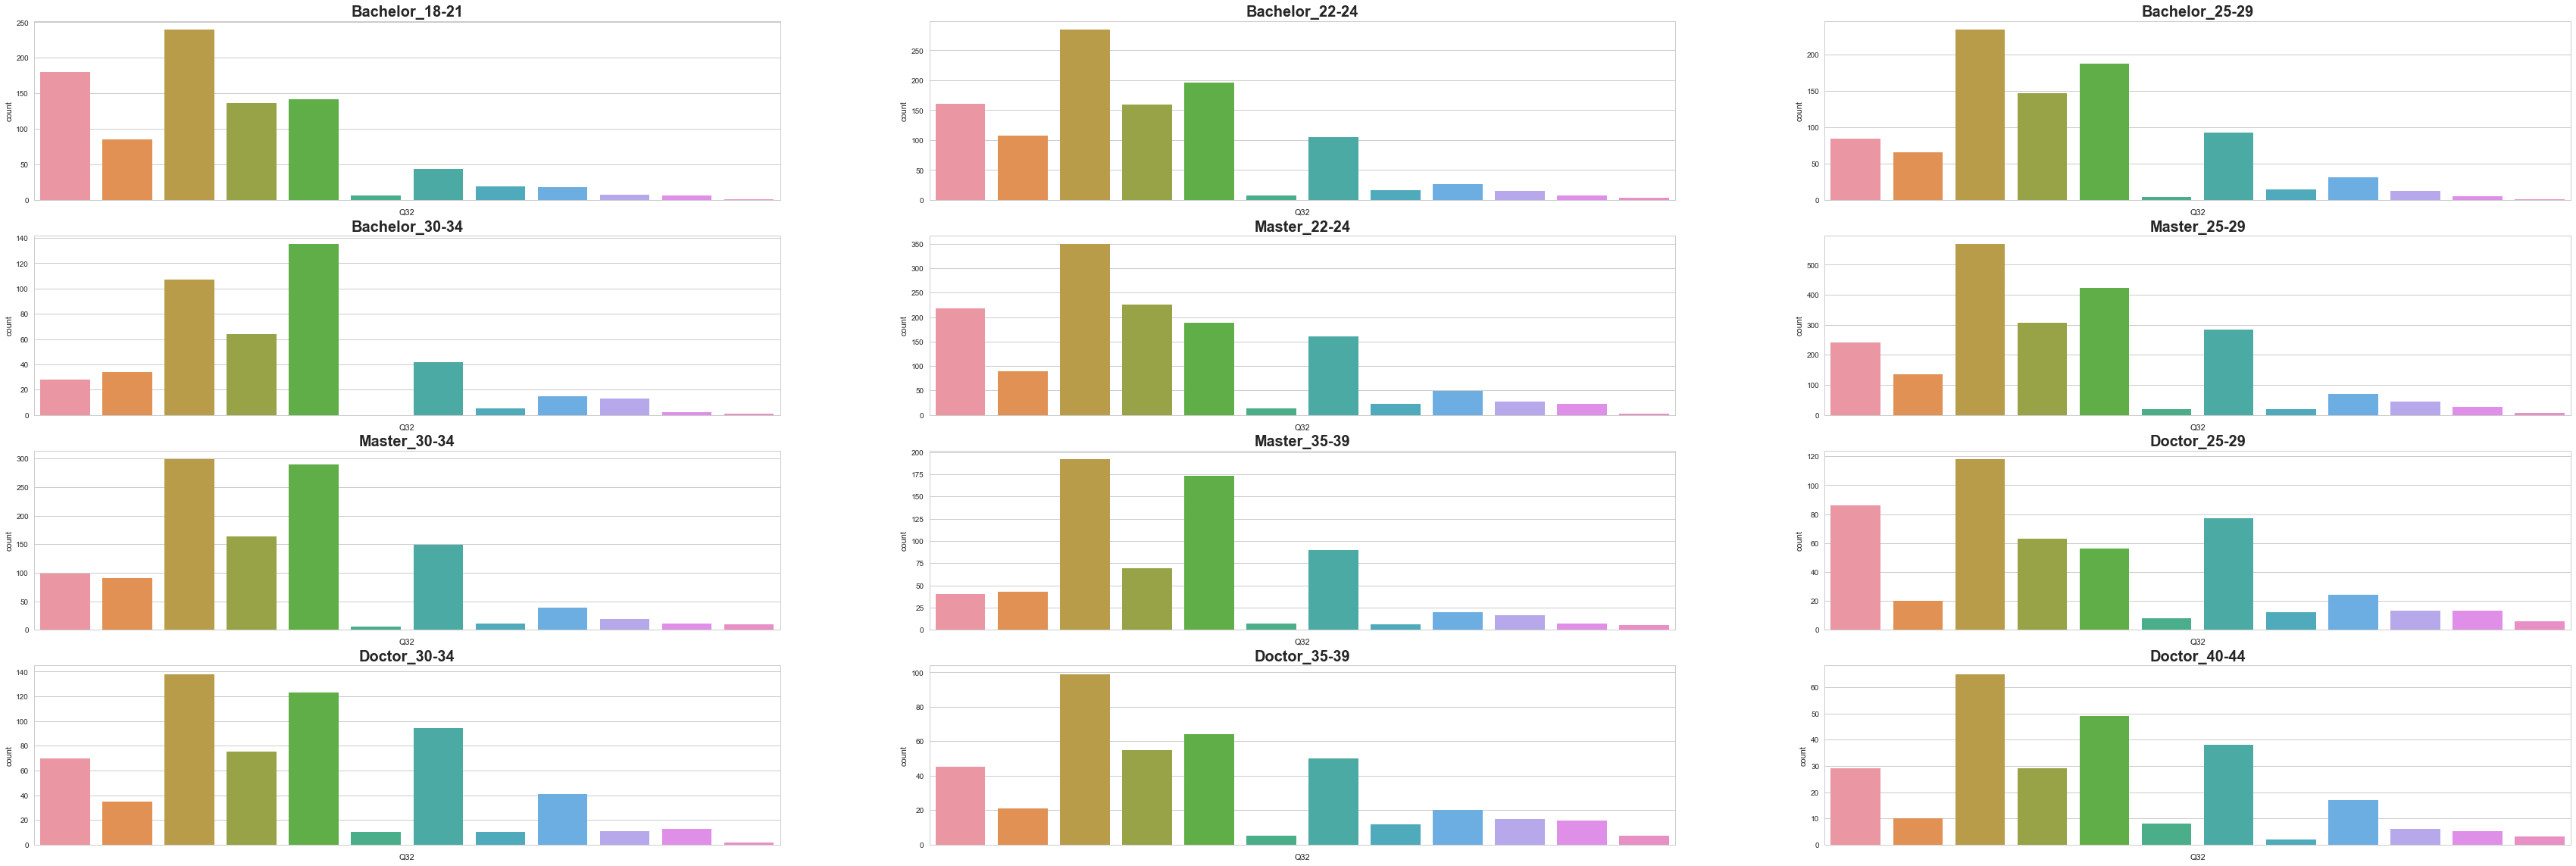

In [167]:
ks.draw_plot(17, dfs_=dfs) # 특이점 없음
ks.draw_plot(23, dfs_=dfs) # 특이점 없음
ks.draw_plot(24, dfs_=dfs) # ★★★
ks.draw_plot(25, dfs_=dfs) # ★★★
ks.draw_plot(26, dfs_=dfs) # 유의미한지 잘 모르겠음
ks.draw_plot(32, dfs_=dfs) # 특이점 없음

Q37. On which online platform have you spent the most amount of time? - Selected Choice


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 Coursera
2 Other
3 Kaggle Learn
4 edX
5 Online University Courses
6 Fast.AI
7 Udemy
8 DataCamp
9 Udacity
10 developers.google.com
11 DataQuest
12 TheSchool.AI


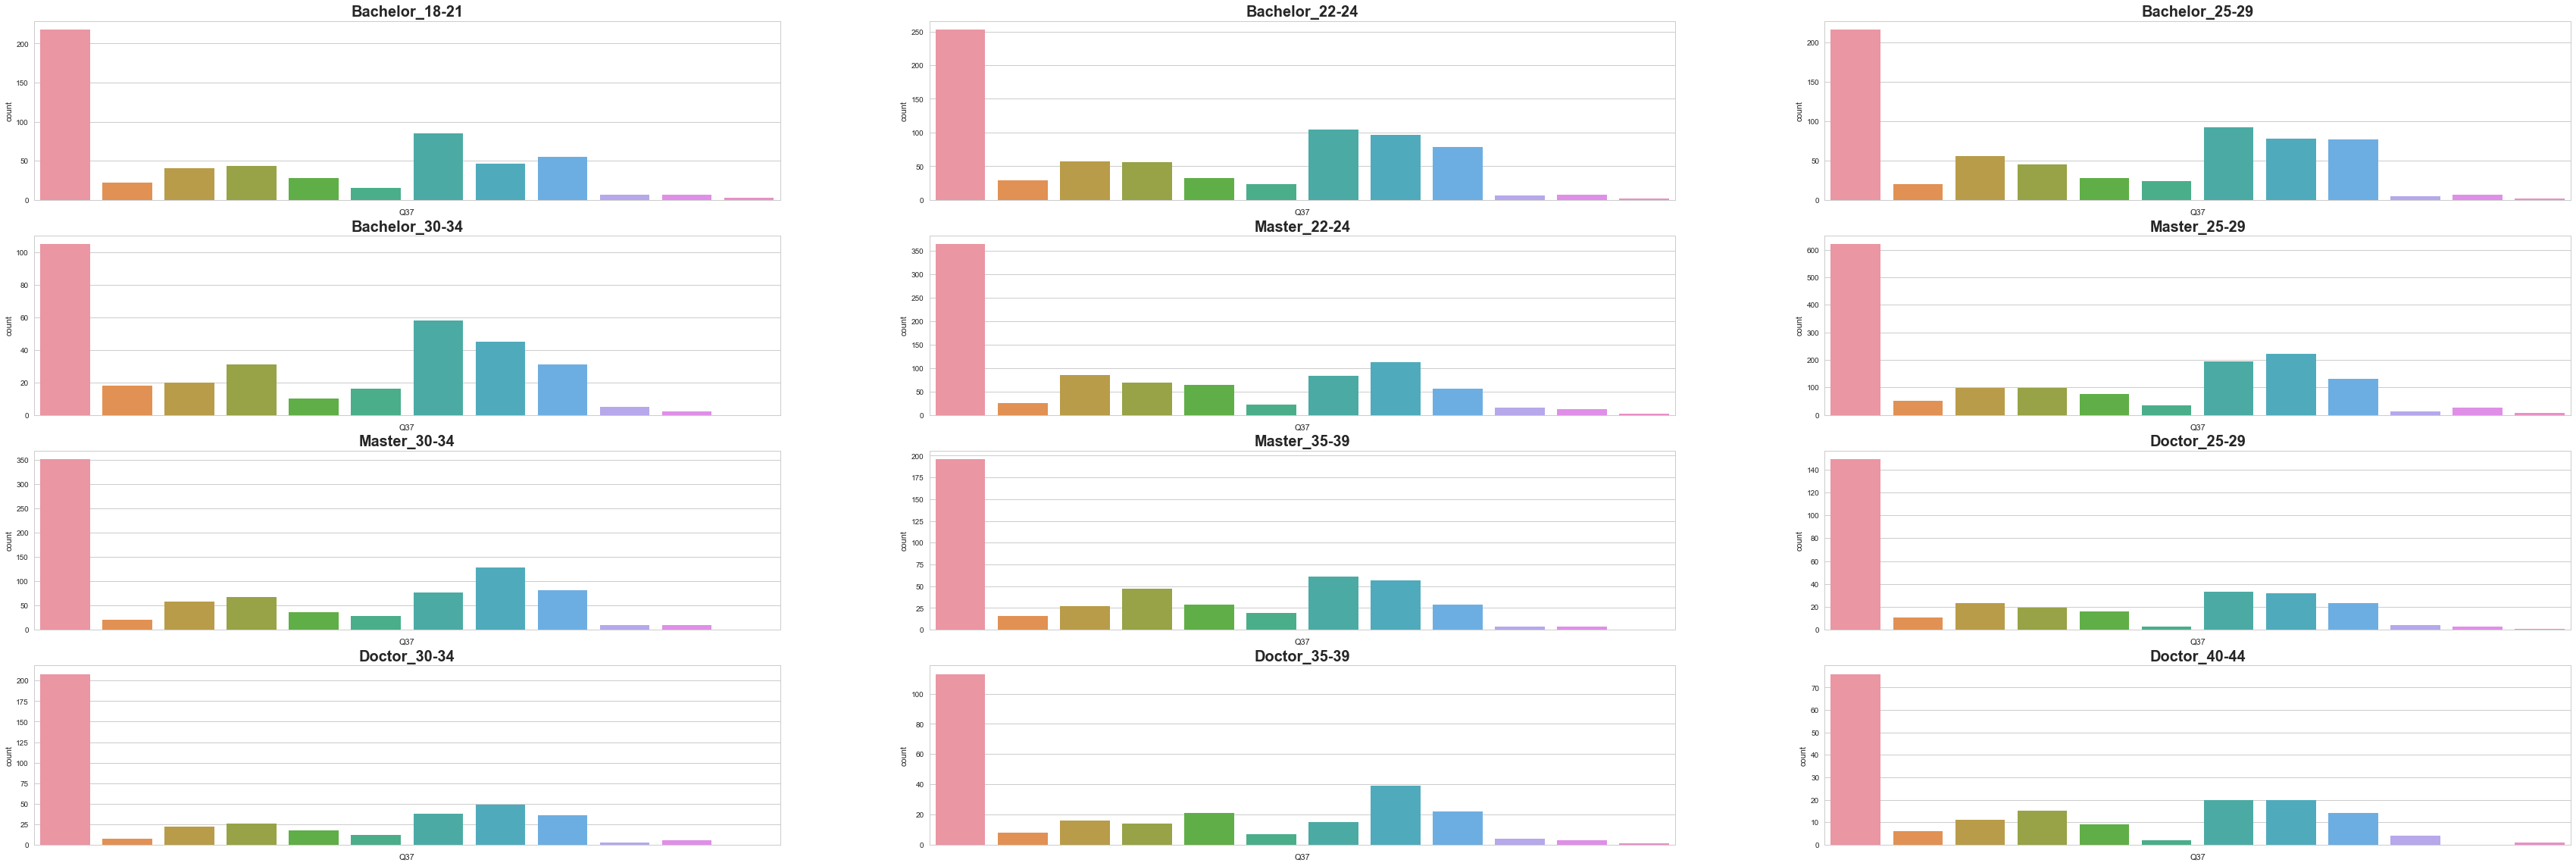

Q40. Which better demonstrates expertise in data science: academic achievements or independent projects? - Your views:


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 Independent projects are slightly more important than academic achievements
2 Independent projects are much more important than academic achievements
3 Independent projects are equally important as academic achievements
4 No opinion; I do not know
5 Independent projects are much less important than academic achievements
6 Independent projects are slightly less important than academic achievements


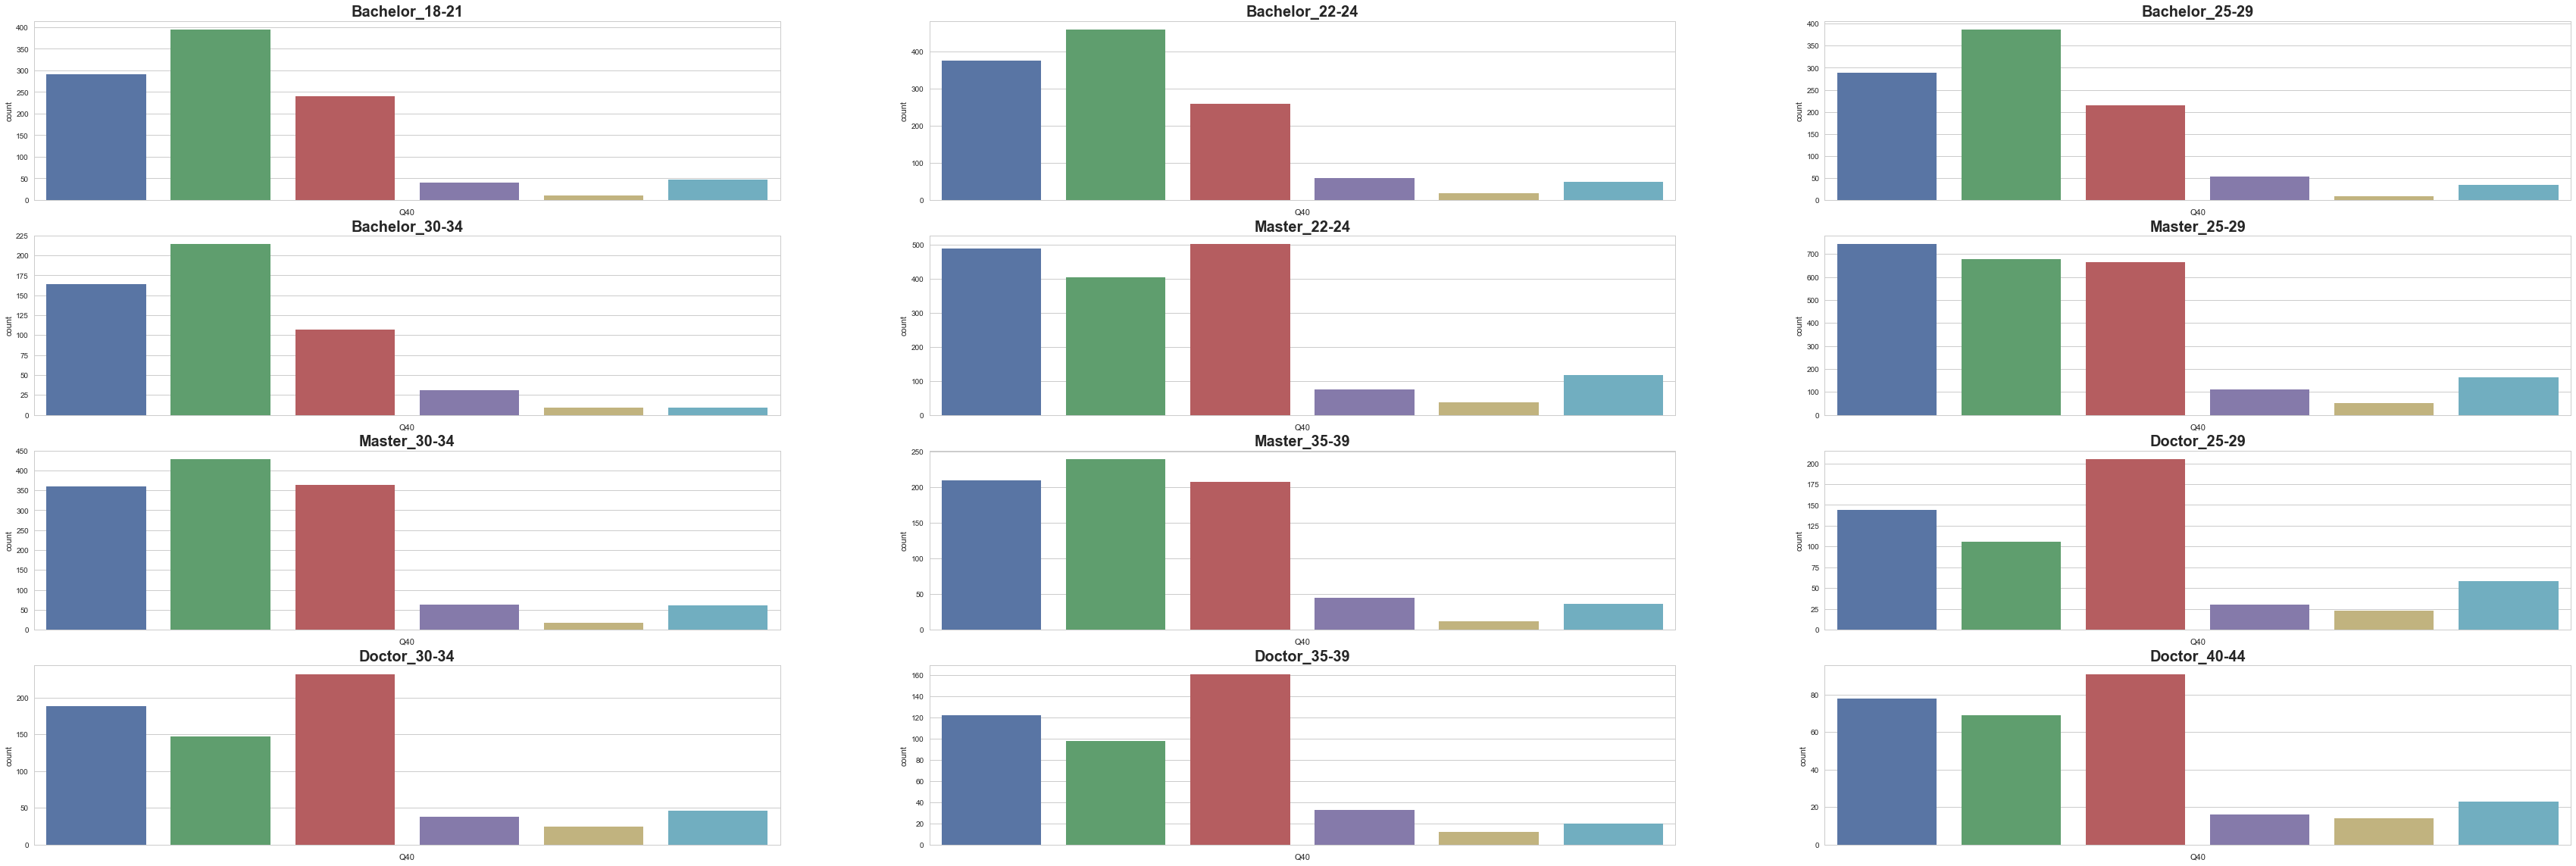

Q48. Do you consider ML models to be "black boxes" with outputs that are difficult or impossible to explain?


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 I do not know; I have no opinion on the matter
2 I am confident that I can explain the outputs of most if not all ML models
3 Yes, most ML models are "black boxes"
4 I view ML models as "black boxes" but I am confident that experts are able to explain model outputs
5 I am confident that I can understand and explain the outputs of many but not all ML models


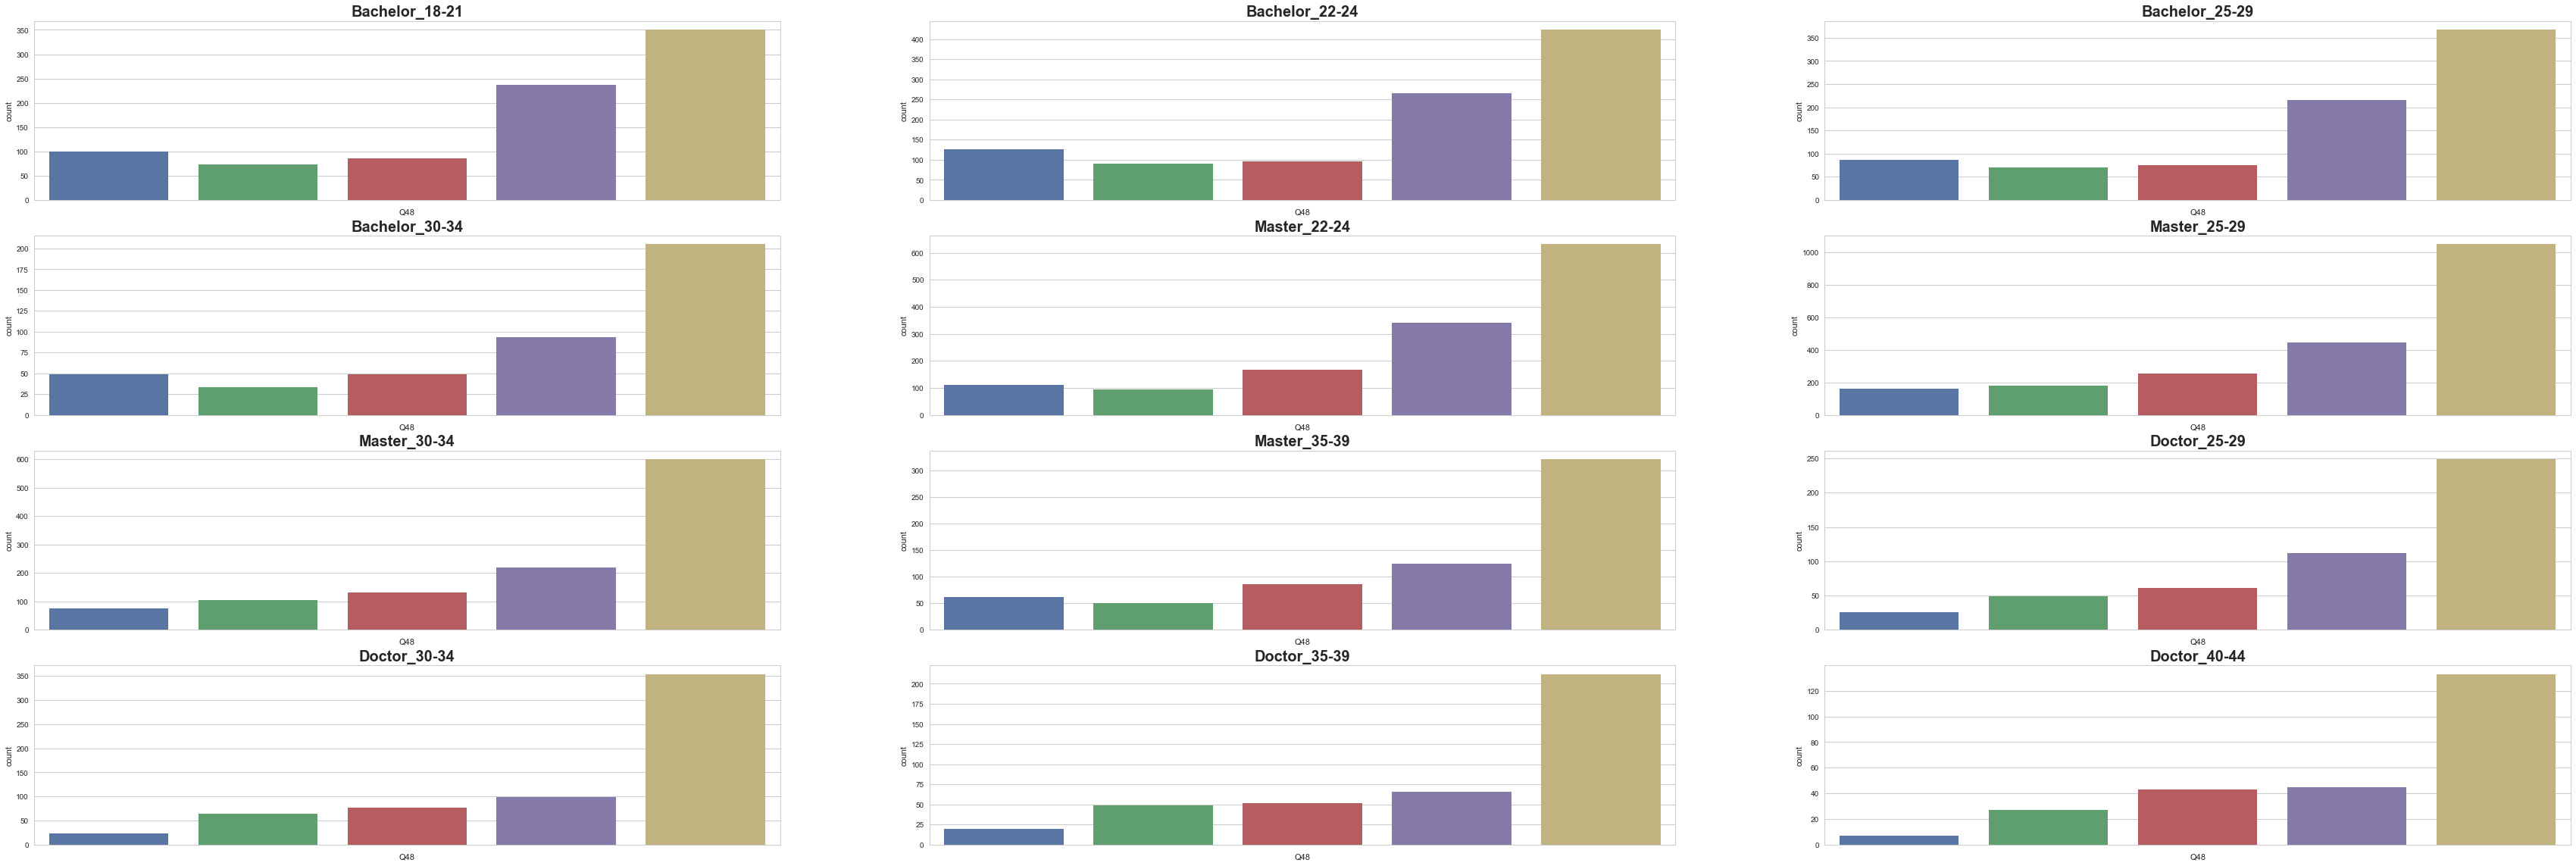

In [165]:
ks.draw_plot(37, dfs_=dfs) # 특이점 없음
ks.draw_plot(40, dfs_=dfs) # 특이점 없음
ks.draw_plot(48, dfs_=dfs) # 특이점 없음

In [169]:
df_count(dfs)
# Bachelor_22-24 1956, Master_25-29 3470, Doctor_30-34 884

Bachelor_18-21 1896
Bachelor_22-24 1956
Bachelor_25-29 1449
Bachelor_30-34 759
Master_22-24 2592
Master_25-29 3470
Master_30-34 1792
Master_35-39 994
Doctor_25-29 767
Doctor_30-34 884
Doctor_35-39 574
Doctor_40-44 368


Q6. Select the title most similar to your current role (or most recent title if retired): - Selected Choice


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 Student
2 Data Scientist
3 Data Analyst
4 Research Assistant
5 Software Engineer
6 Business Analyst
7 Other
8 Not employed
9 Statistician
10 Data Engineer
11 Chief Officer
12 Research Scientist
13 Consultant
14 Salesperson
15 Developer Advocate
16 Product/Project Manager
17 Manager
18 Marketing Analyst


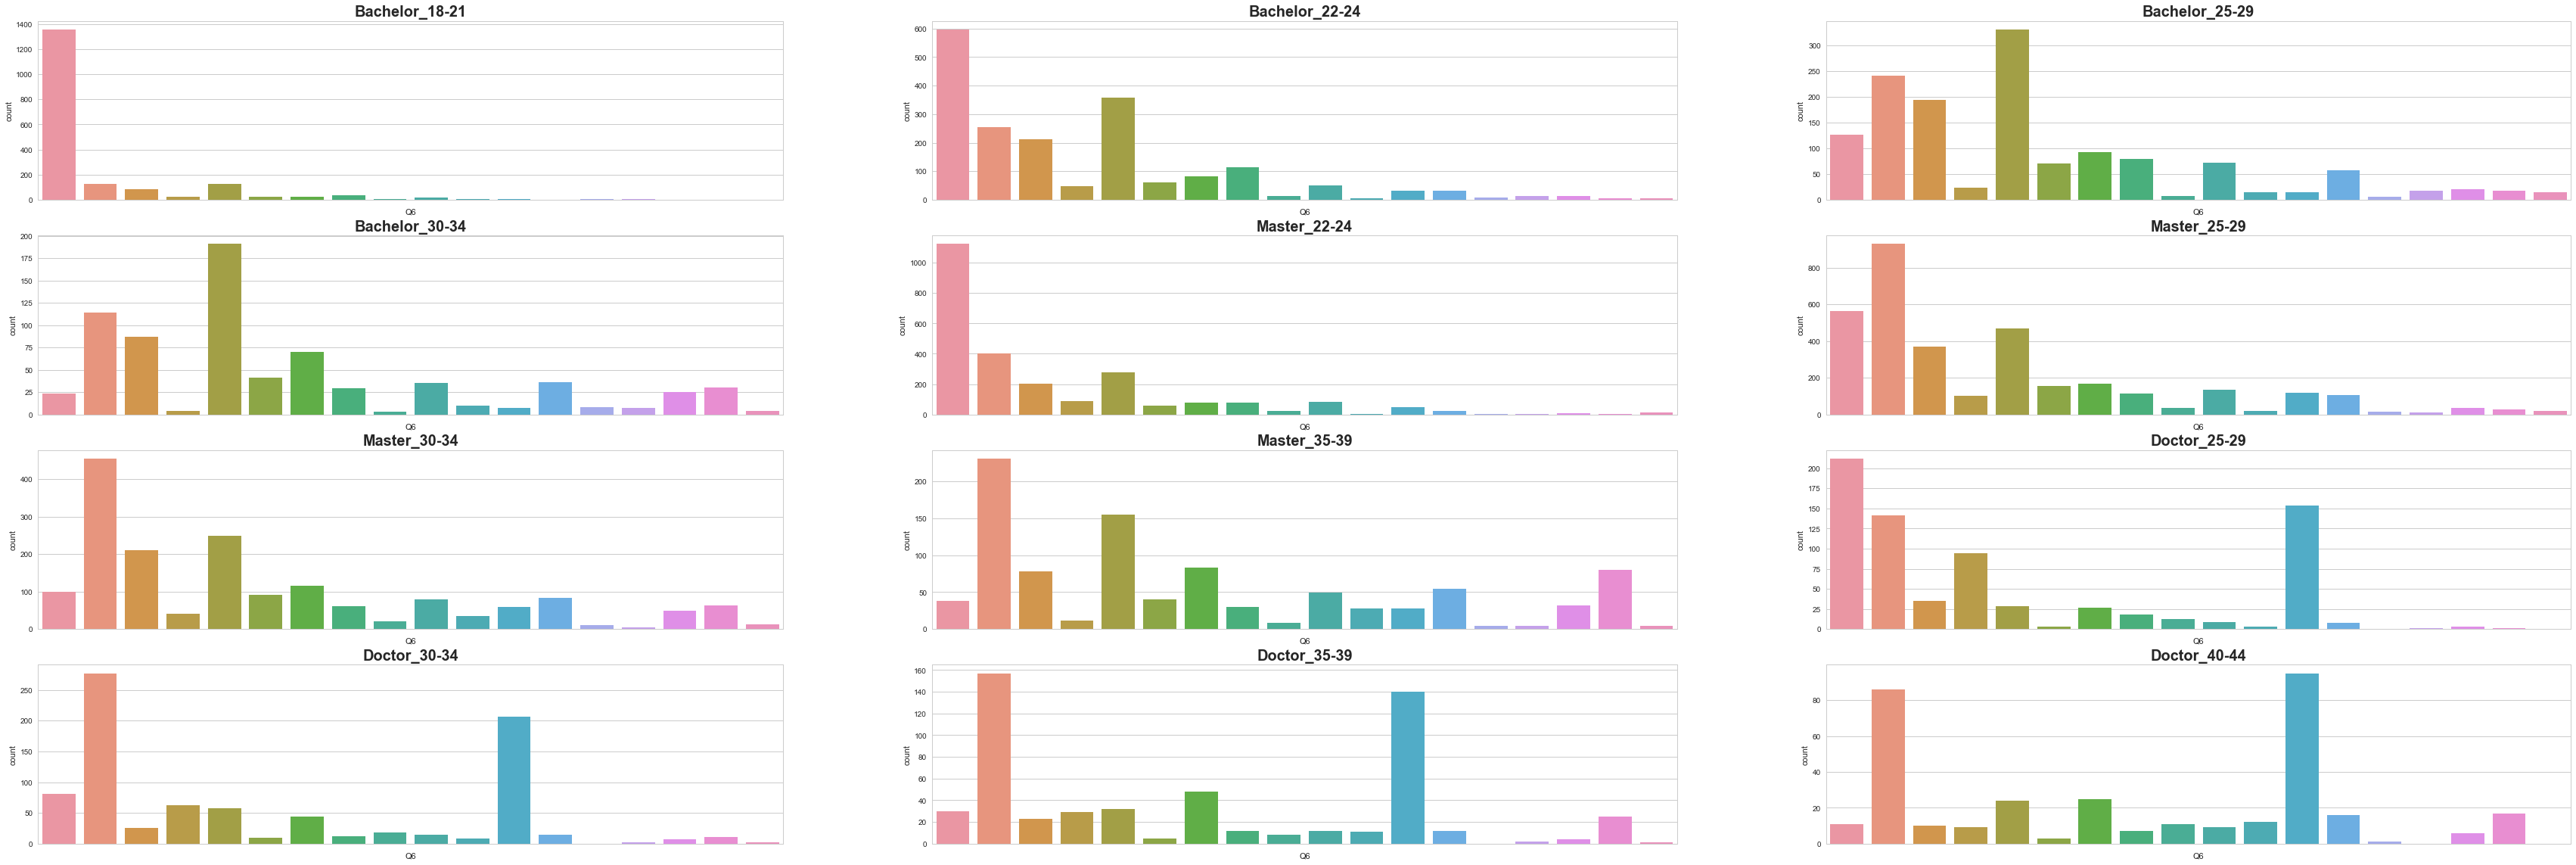

Q24. How long have you been writing code to analyze data?


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 < 1 year
2 3-5 years
3 1-2 years
4 I have never written code but I want to learn
5 5-10 years
6 I have never written code and I do not want to learn


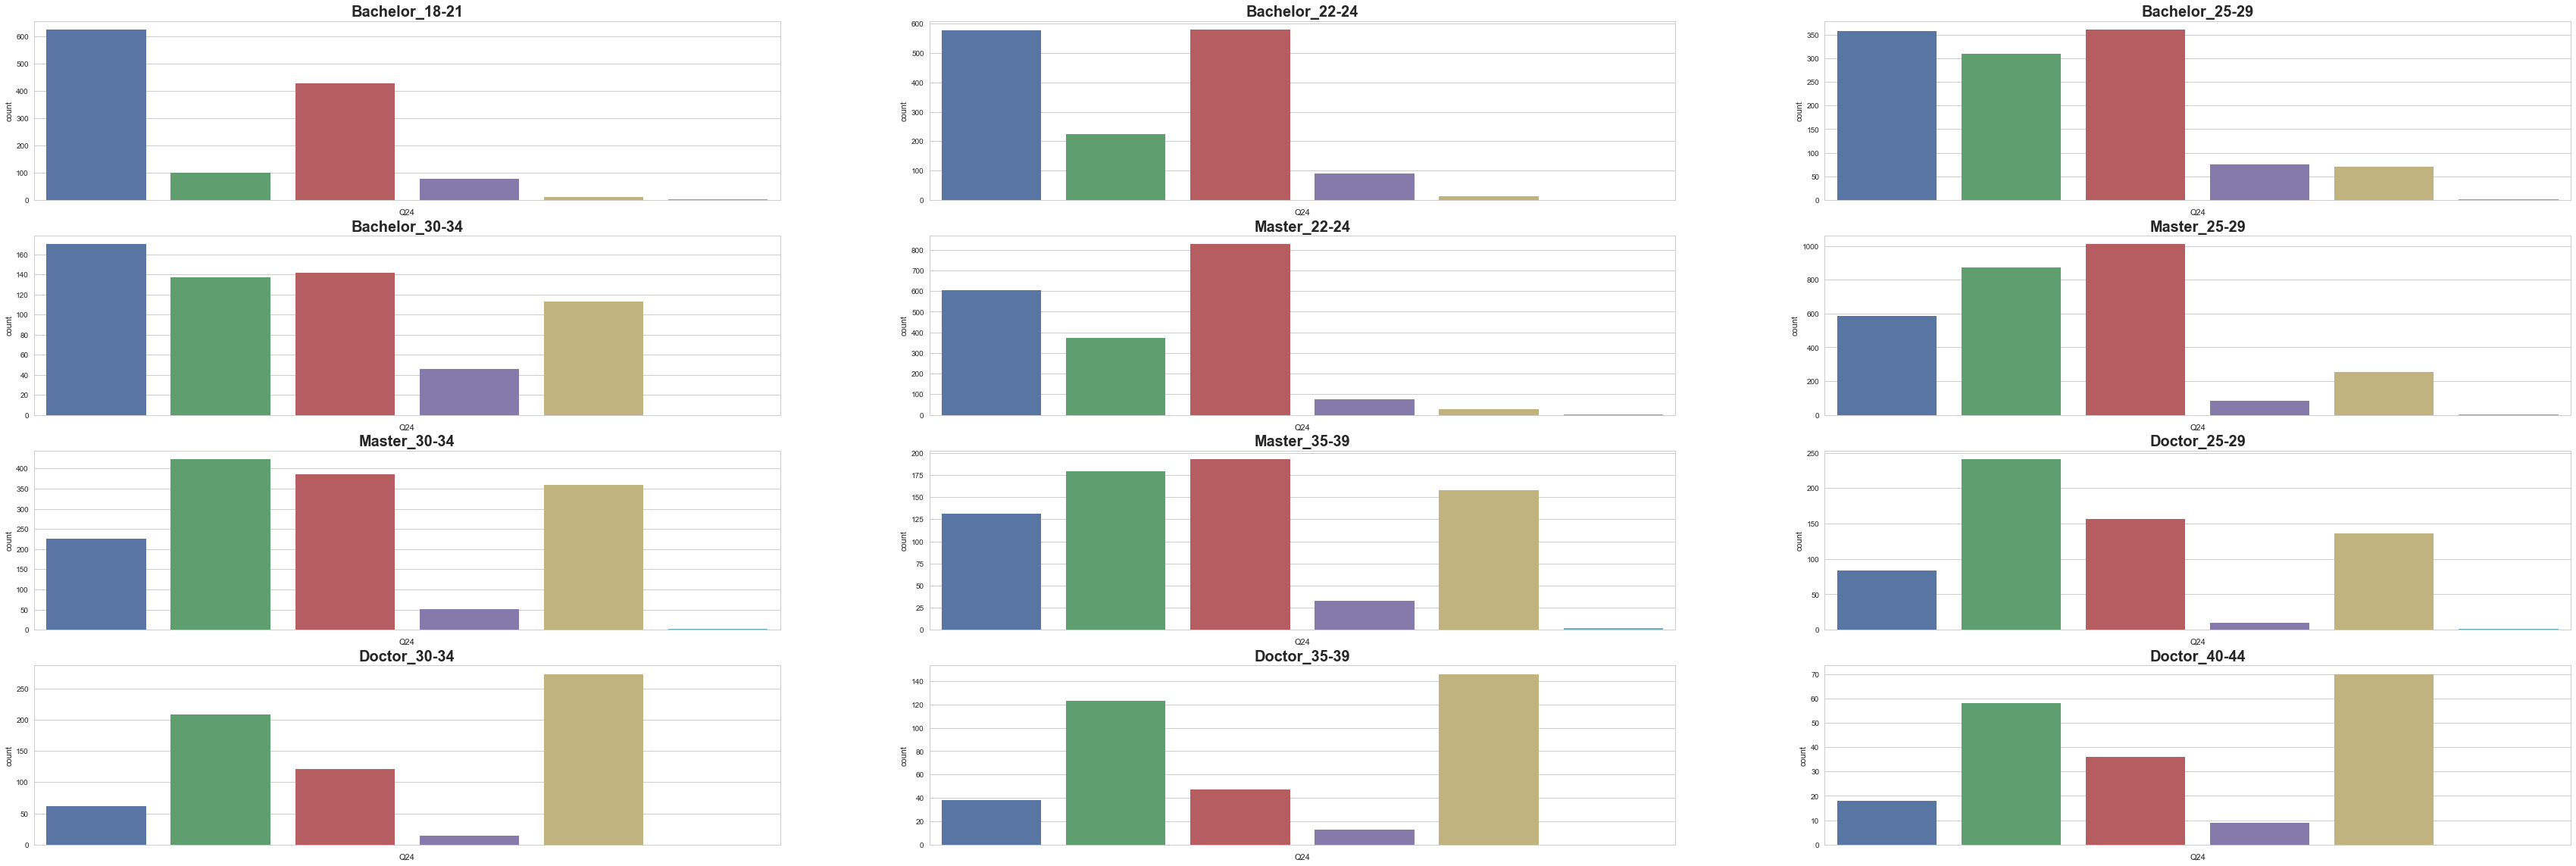

Q25. For how many years have you used machine learning methods (at work or in school)?


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 < 1 year
2 1-2 years
3 3-4 years
4 2-3 years
5 I have never studied machine learning but plan to learn in the future
6 I have never studied machine learning and I do not plan to
7 5-10 years
8 4-5 years


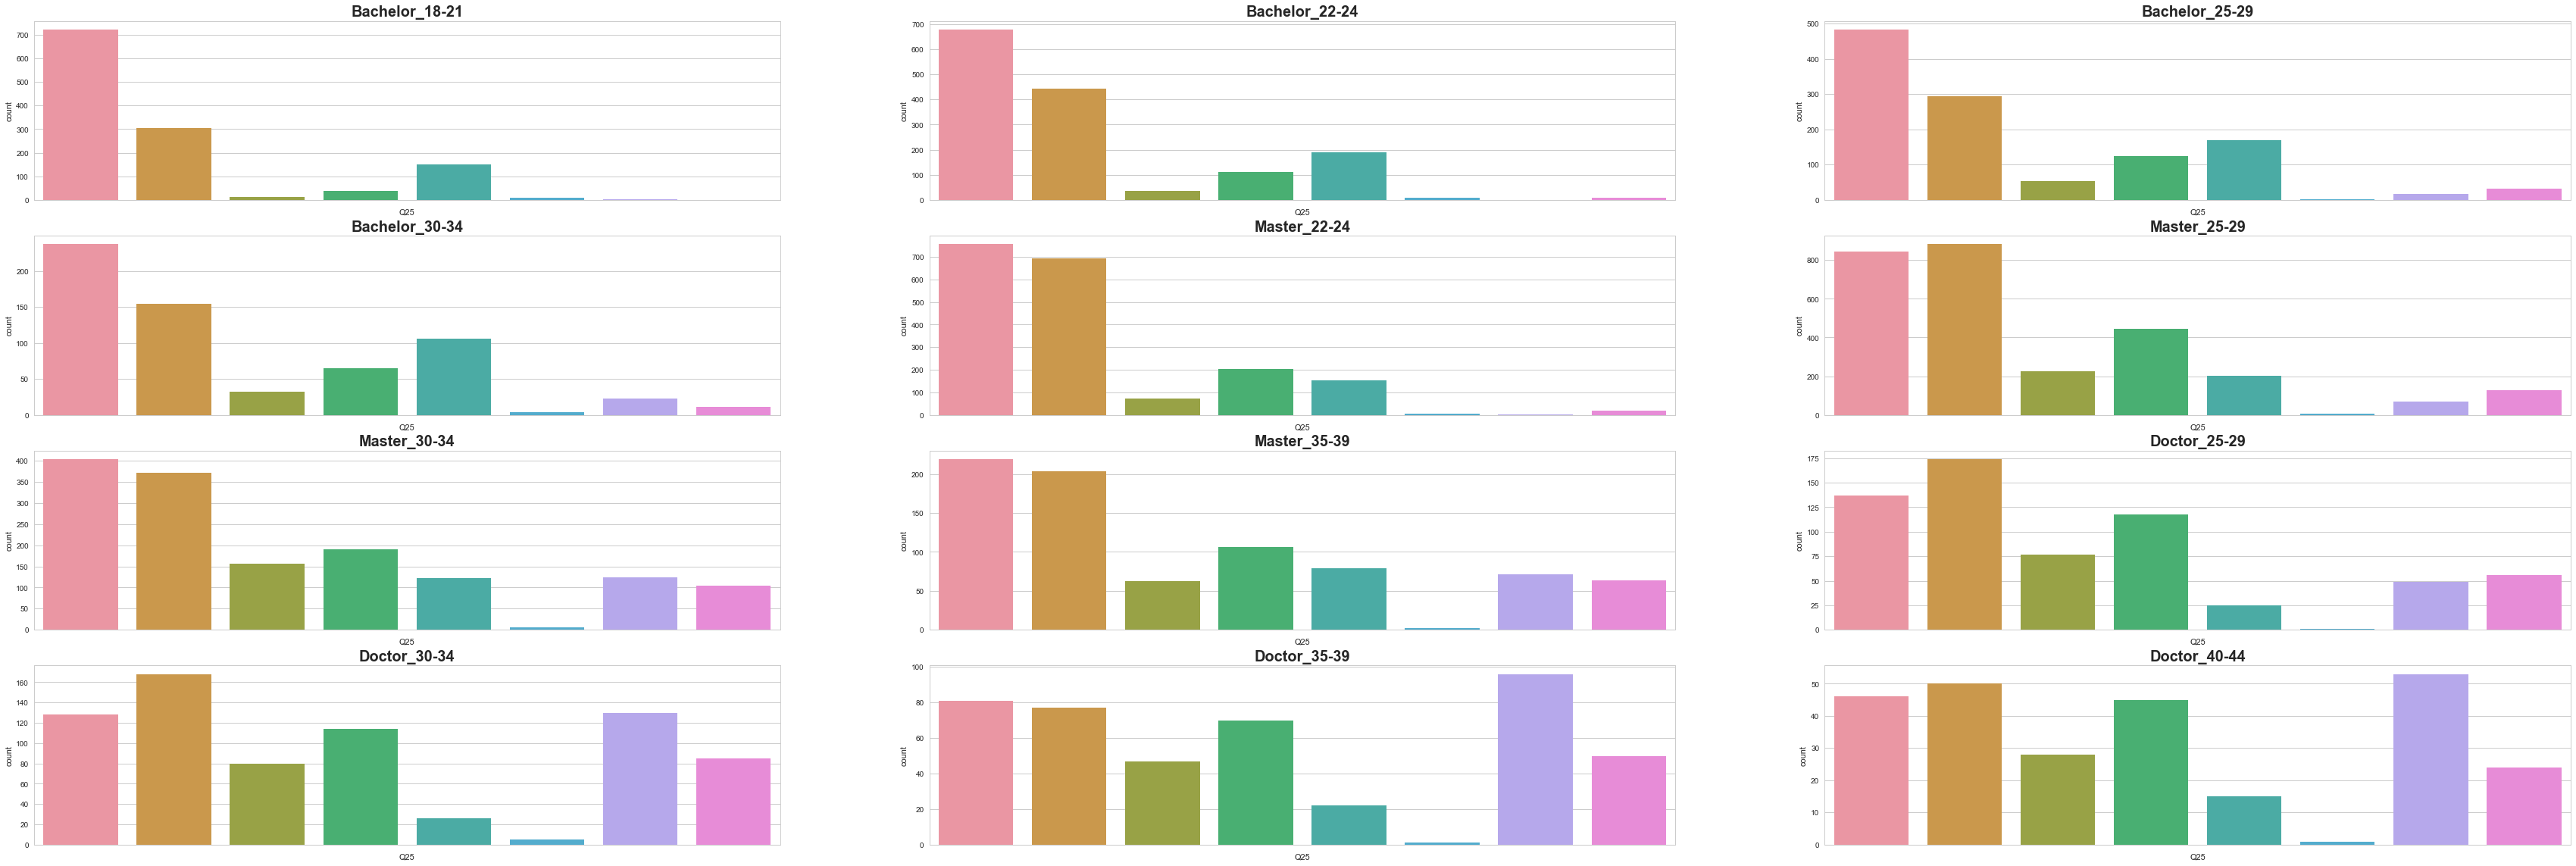

Q26. Do you consider yourself to be a data scientist?


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 Definitely not
2 Probably yes
3 Definitely yes
4 Probably not
5 Maybe


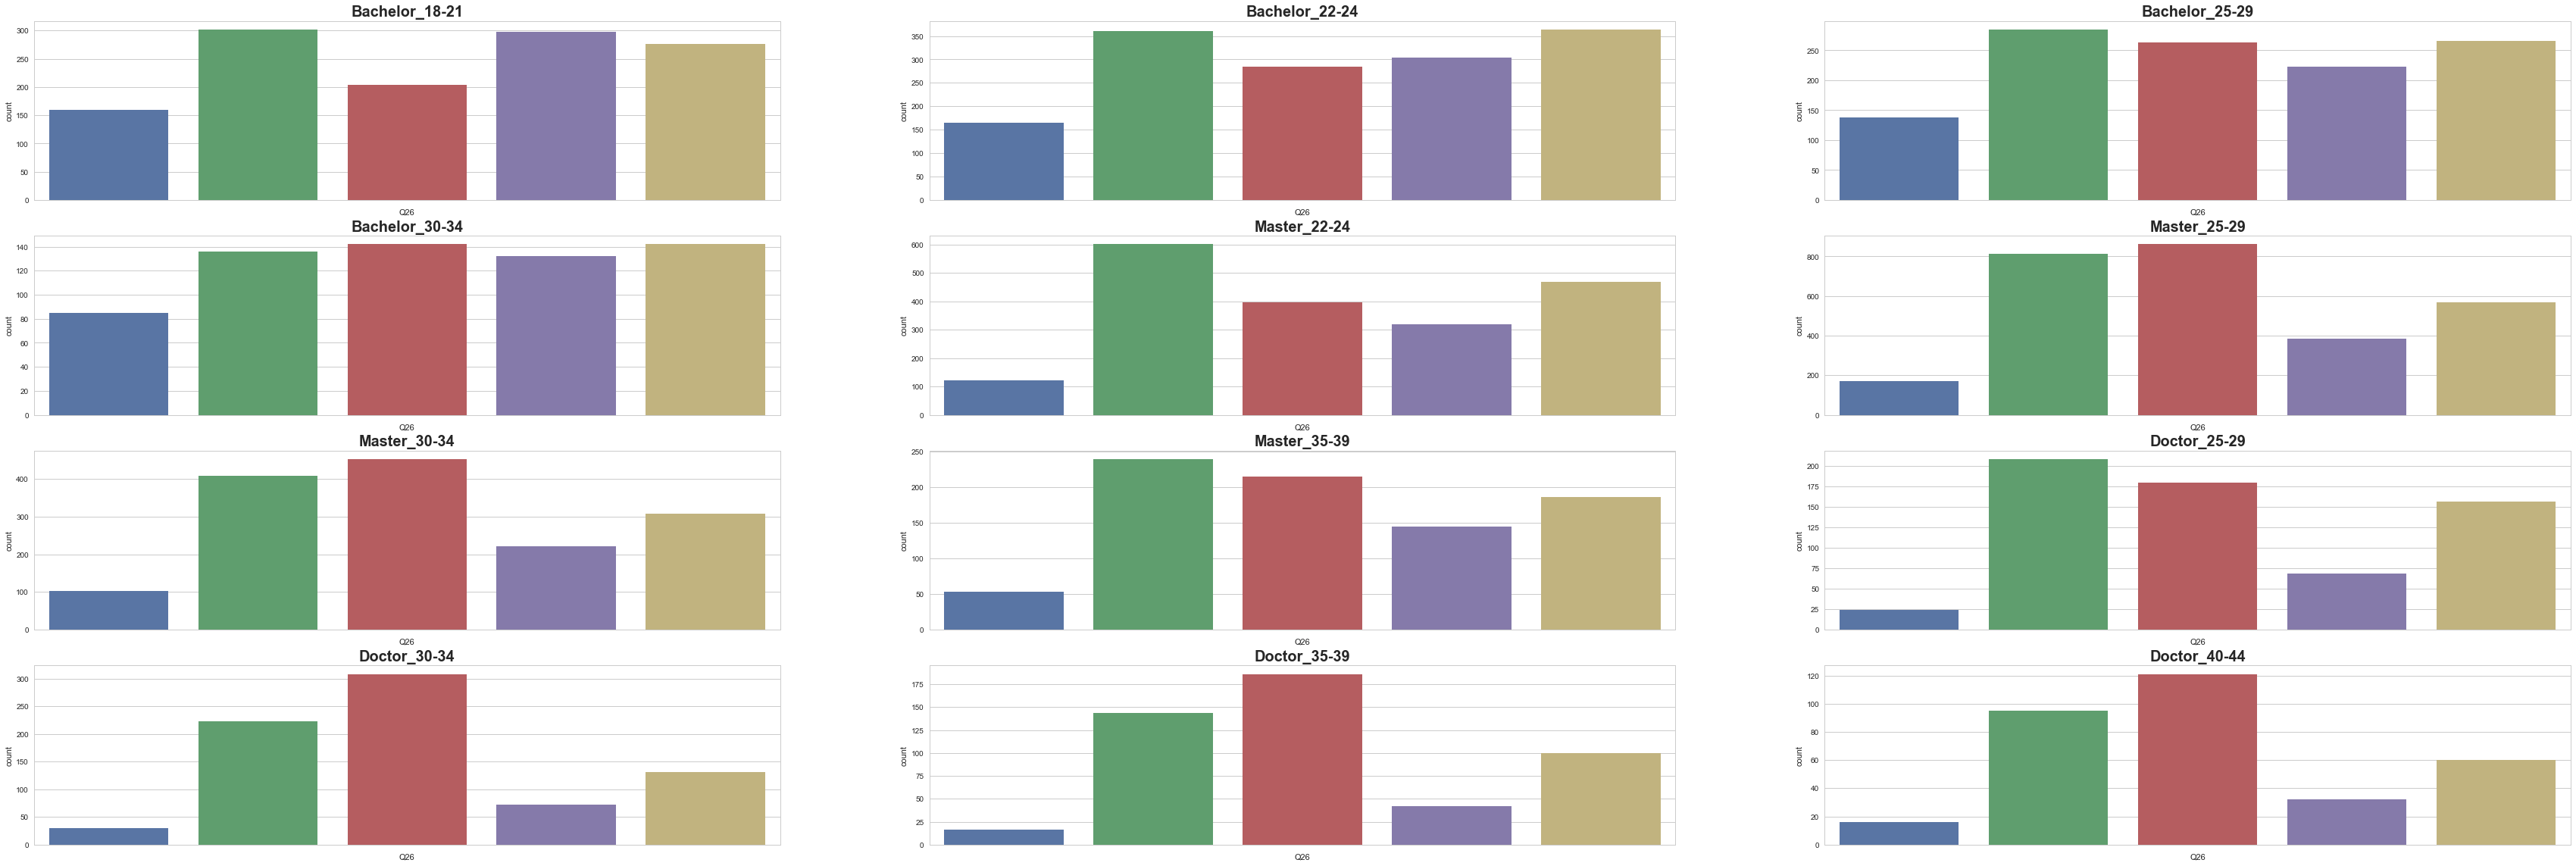

In [168]:
ks.draw_plot(6, dfs_=dfs) # 현재 직무
ks.draw_plot(24, dfs_=dfs) # 데이터 분석을 위해 얼마나 오래 코드를 작성해왔는가
ks.draw_plot(25, dfs_=dfs) # ML 방법을 직장이나 학교에서 몇 년 동안 사용해 왔는가
ks.draw_plot(26, dfs_=dfs) # 자신을 데이터 사이언티스트라고 생각하는가

# Bachelor_22-24 1956, Master_25-29 3470, Doctor_30-34 884 세 구간으로 압축하여
# 위 질문들에 대해 국가별, 성별을 볼 것
# 새 주피터 노트북에

In [ ]:
ks.draw_plot(9, dfs_=dfs)

In [48]:
dfs_1 = {}
for i in countries:
    dfs_1[i] = df[(df['Q1']=='Female')&(df['Q2']=="25-29")&(df['Q3']==i)&(df['Q4']=='Master’s degree')]

In [54]:
for i in countries:
    print(i, len(dfs_1[i]))

Canada 19
United States of America 220
Germany 32
India 81
China 40
South Korea 2


Q5. Which best describes your undergraduate major? - Selected Choice


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 Computer science (software engineering, etc.)
2 Humanities (history, literature, philosophy, etc.)
3 Mathematics or statistics
4 A business discipline (accounting, economics, finance, etc.)
5 Physics or astronomy
6 Engineering (non-computer focused)
7 Social sciences (anthropology, psychology, sociology, etc.)
8 Medical or life sciences (biology, chemistry, medicine, etc.)


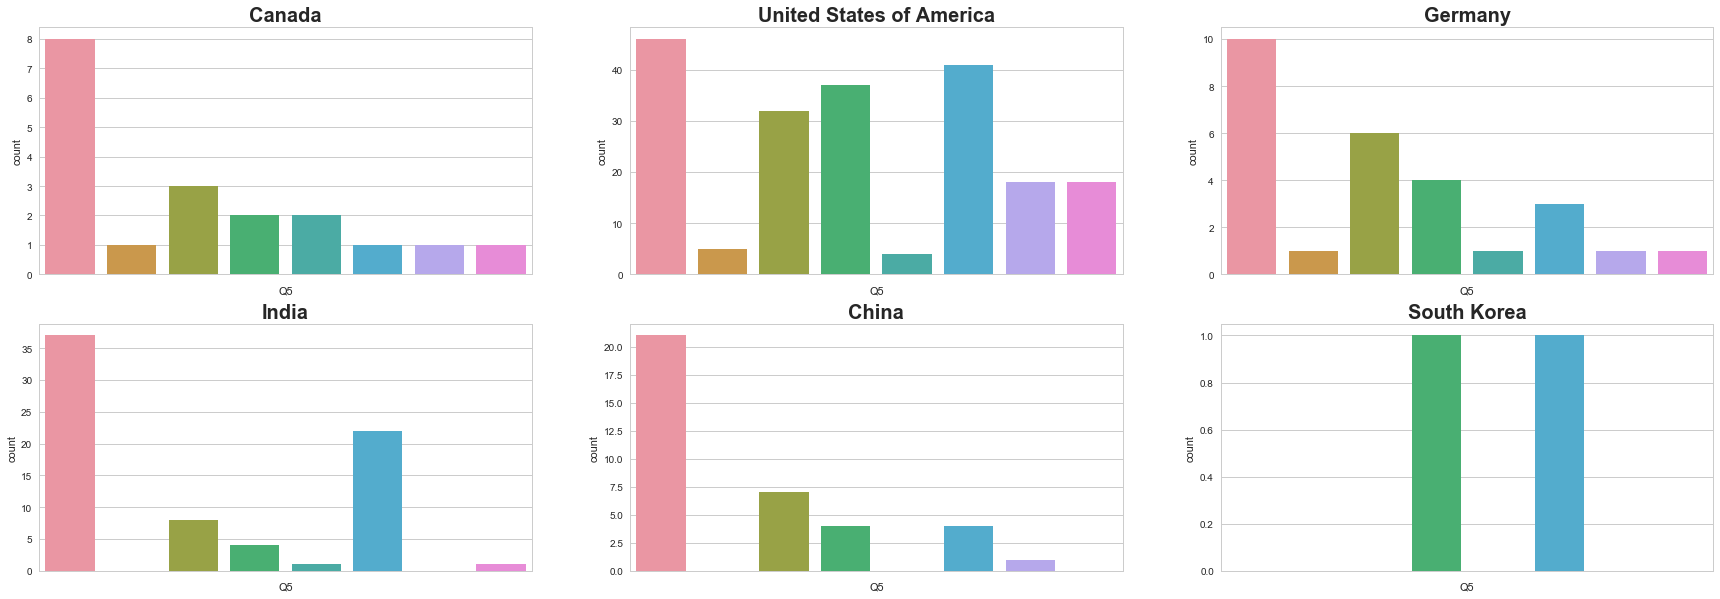

Q6. Select the title most similar to your current role (or most recent title if retired): - Selected Choice


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 Student
2 Business Analyst
3 Data Scientist
4 Product/Project Manager
5 Data Analyst
6 Data Engineer
7 Software Engineer


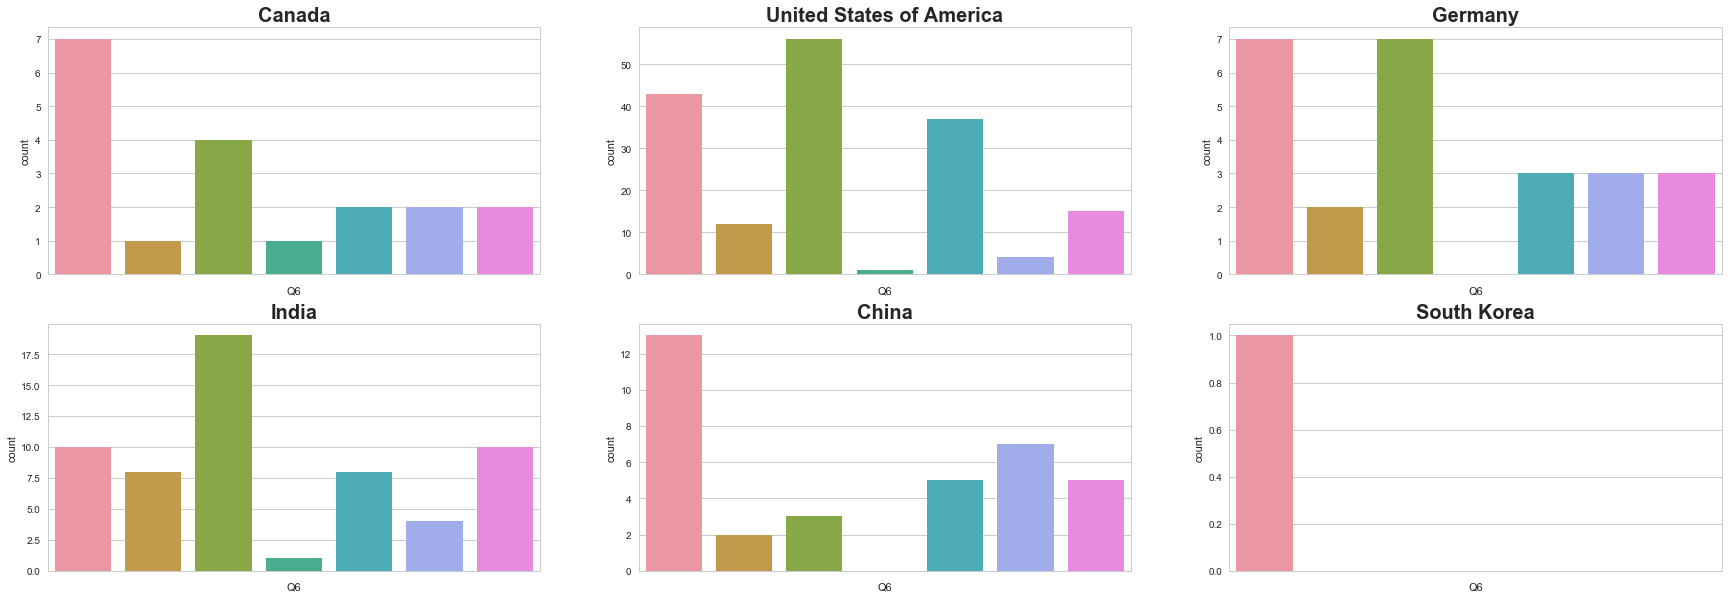

Q7. In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 I am a student
2 Energy/Mining
3 Accounting/Finance
4 Academics/Education
5 Computers/Technology
6 Online Service/Internet-based Services


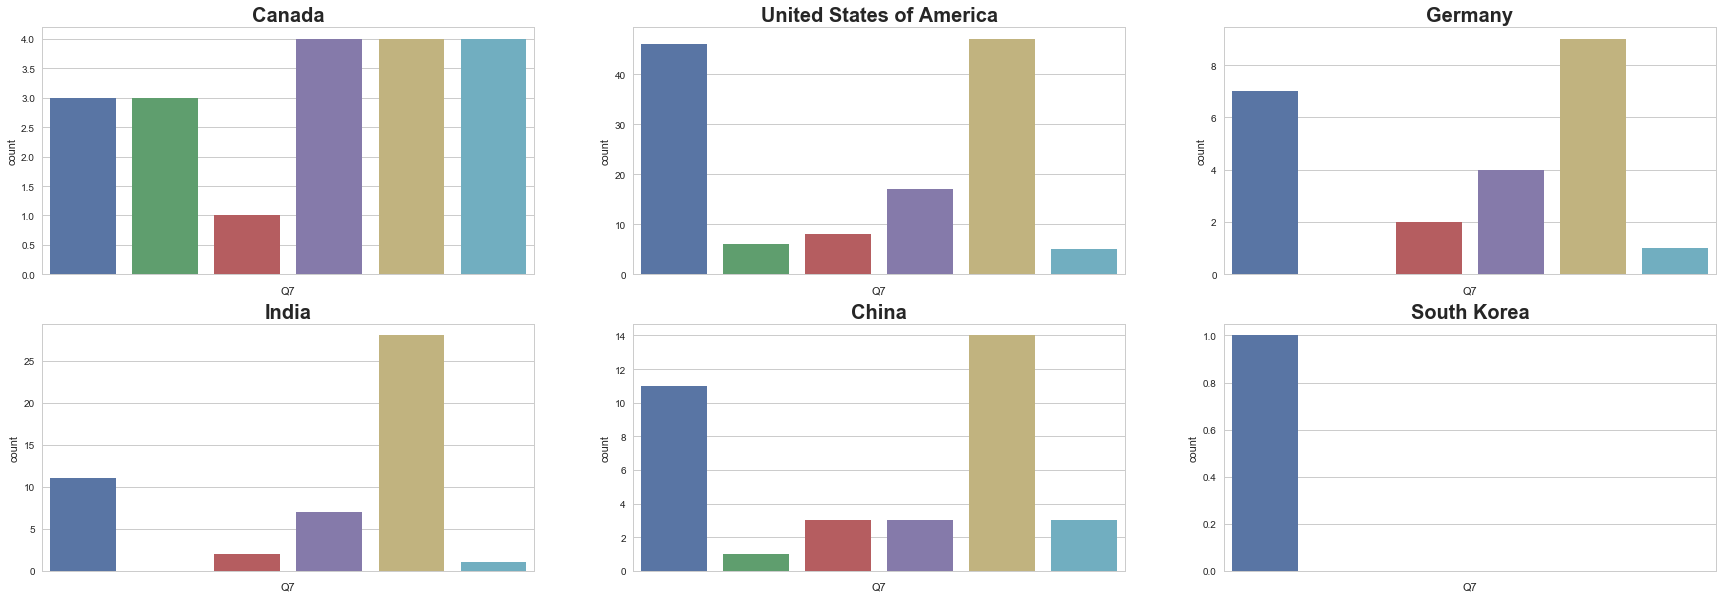

In [55]:
ks.draw_plot(5, dfs_=dfs_1)
ks.draw_plot(6, dfs_=dfs_1)
ks.draw_plot(7, dfs_=dfs_1)

In [50]:
len(df[df["Q3"]=="South Korea"])

188

- **가장 많은 수의 집단의 프로파일링**
- **기준별 가장 많은 수의 집단의 프로파일링**
----------------------
- 기준1 : 국가(Q3)
- 기준2 : 성별(Q1)
- 기준3 : 나이(Q2)
- 기준4 : 학력(Q4)
- 기준5 : 전공(Q5)
- 기준6 : 직무(Q6)
- 기준7 : 산업군(Q7)
- 기준8 : 경력(Q8)
----------------------

In [4]:
# 단수응답

In [5]:
df.columns.values

array(['Time from Start to Finish (seconds)', 'Q1', 'Q1_OTHER_TEXT', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q6_OTHER_TEXT', 'Q7', 'Q7_OTHER_TEXT',
       'Q8', 'Q9', 'Q10', 'Q11_Part_1', 'Q11_Part_2', 'Q11_Part_3',
       'Q11_Part_4', 'Q11_Part_5', 'Q11_Part_6', 'Q11_Part_7',
       'Q11_OTHER_TEXT', 'Q12_MULTIPLE_CHOICE', 'Q12_Part_1_TEXT',
       'Q12_Part_2_TEXT', 'Q12_Part_3_TEXT', 'Q12_Part_4_TEXT',
       'Q12_Part_5_TEXT', 'Q12_OTHER_TEXT', 'Q13_Part_1', 'Q13_Part_2',
       'Q13_Part_3', 'Q13_Part_4', 'Q13_Part_5', 'Q13_Part_6',
       'Q13_Part_7', 'Q13_Part_8', 'Q13_Part_9', 'Q13_Part_10',
       'Q13_Part_11', 'Q13_Part_12', 'Q13_Part_13', 'Q13_Part_14',
       'Q13_Part_15', 'Q13_OTHER_TEXT', 'Q14_Part_1', 'Q14_Part_2',
       'Q14_Part_3', 'Q14_Part_4', 'Q14_Part_5', 'Q14_Part_6',
       'Q14_Part_7', 'Q14_Part_8', 'Q14_Part_9', 'Q14_Part_10',
       'Q14_Part_11', 'Q14_OTHER_TEXT', 'Q15_Part_1', 'Q15_Part_2',
       'Q15_Part_3', 'Q15_Part_4', 'Q15_Part_5', 'Q15_Part_6',


In [10]:
col = df.columns.values

col_single = [i for i in col if "Q" in i]
col_single = [i for i in col_single if "Part" not in i]
col_single = [i for i in col_single if "OTHER" not in i]
col_single = [i for i in col_single if "MULTIPLE" not in i]
col_single
# How can I do this at once

['Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9',
 'Q10',
 'Q17',
 'Q18',
 'Q20',
 'Q22',
 'Q23',
 'Q24',
 'Q25',
 'Q26',
 'Q32',
 'Q37',
 'Q40',
 'Q43',
 'Q46',
 'Q48']

In [11]:
df_answer = df.loc[1:]
dic = {}
for i in col_single:
    dic[i] = list(df_answer[i].unique())

In [12]:
dic

{'Q1': ['Female', 'Male', 'Prefer not to say', 'Prefer to self-describe'],
 'Q10': ['I do not know',
  'No (we do not use ML methods)',
  nan,
  'We are exploring ML methods (and may one day put a model into production)',
  'We recently started using ML methods (i.e., models in production for less than 2 years)',
  'We have well established ML methods (i.e., models in production for more than 2 years)',
  'We use ML methods for generating insights (but do not put working models into production)'],
 'Q17': [nan,
  'Java',
  'Python',
  'SQL',
  'Javascript/Typescript',
  'C#/.NET',
  'R',
  'MATLAB',
  'C/C++',
  'Visual Basic/VBA',
  'Bash',
  'Scala',
  'PHP',
  'SAS/STATA',
  'Other',
  'Ruby',
  'Go',
  'Julia'],
 'Q18': ['Python',
  'SQL',
  'R',
  'Other',
  'Scala',
  'None',
  'Java',
  'MATLAB',
  'C++',
  nan,
  'SAS',
  'Javascript',
  'Go',
  'VBA'],
 'Q2': ['45-49',
  '30-34',
  '35-39',
  '22-24',
  '25-29',
  '18-21',
  '40-44',
  '55-59',
  '60-69',
  '50-54',
  '80+',
 

In [34]:
dic['Q4']

['Doctoral degree',
 'Bachelor’s degree',
 'Master’s degree',
 'Professional degree',
 'Some college/university study without earning a bachelor’s degree',
 'I prefer not to answer',
 'No formal education past high school',
 nan]

In [14]:
col[0]

'Time from Start to Finish (seconds)'

In [23]:
# 캐나다, 미국, 독일, 중국, 인도의
# 여성
# 25-29
# 학사

def dfs_by_criterias(country = [], sex="", age="", edu=""):
    dfs = {}
    country_name = country
    sex = sex
    age = age
    edu = edu
    for i in country_name:
        df = ks.get_df_I_want(i)
        df_ = df[(df['Q1']==sex)&(df['Q2']==age)&(df['Q4']==edu)]
        dfs["{}".format(i)] = df_
    return dfs

# TypeError: tuple indices must be integers, not str
# don't make a tuple with stupid commas